# <center> __COSC 4380 - Machine Learning II__ </center>

# <font color=green>*Capstone Project*</font>
### Student Name: Cory Munselle
### Date: 12/08/2022
### Description: Classify different songs based on genre

#### Jump to different parts: [Part 1](#part_1) [Part 2](#part_2) [Part 3](#part_3) [Conclusion](#conclusion)

<font color=red>Before I begin training different models, I want to understand how librosa works and talk a bit about what information we'll be extracting from our music to train our models.</font>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import os
from PIL import Image
import pathlib
import csv
try:
    import librosa
    import librosa.display as disp
except ModuleNotFoundError:
    %pip install librosa
    import librosa
    import librosa.display as disp
import IPython.display as ipd

test_audio = './Music Genres Dataset/genres/blues/blues.00000.wav'

y, sr = librosa.load(test_audio, sr=None)

ipd.Audio(test_audio)

<font color='red'>This is just a test to show how loading works in librosa as well as displaying how IPython has built-in audio display features. It's also verification that the file is properly being loaded.</font>

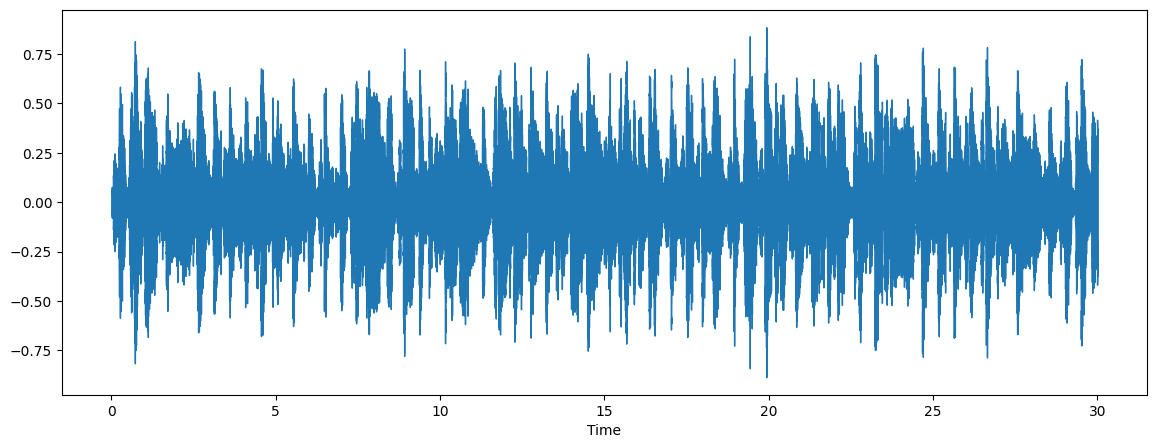

In [8]:
plt.figure(figsize=(14, 5))
disp.waveshow(y, sr=sr)

<font color='red'>Graphing seems to work through librosa's built in display functionality. What's interesting is how it's mapped: the left part represents the amplitude envelope, which is the change in amplitude of a sound over time. The envelope is mapped between 0 and 1 inclusive, represented the relative 'strength' of the sound wave.</font>

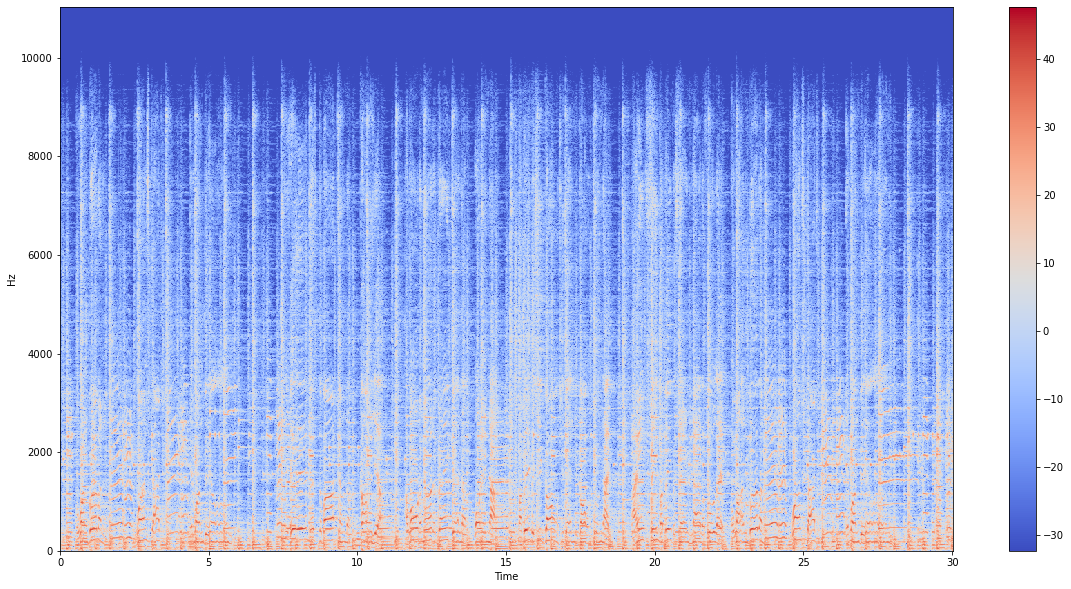

In [3]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

<font color='red'>This is a spectrogram, which is a colored representation of the different frequencies of any given sound. Spectrograms are displayed as a heatmap, with the more red sections of the spectrogram being more intense. Given the representation of our blues song, we can tell that most of the sound resides on the lower end of the frequency spectrum.</font>

16


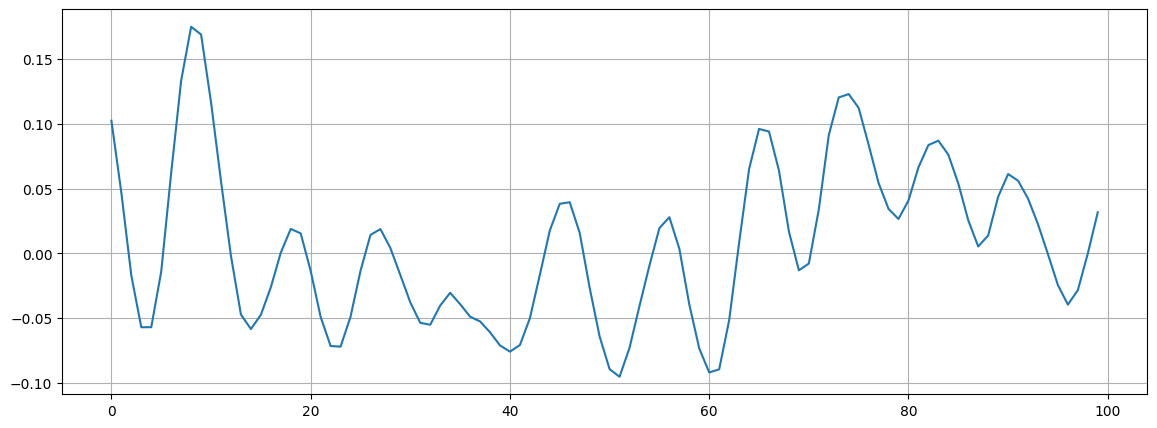

In [9]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

<font color='red'>This a graph of the zero crossing rate, or the number of times the song goes from a positive amplitude to a negative one. This can be viewed as a 'gap' in the sound, as the sound wave goes from a peak to a trough and the air fills in the gap that the instrument displaced. Songs with many percussive instruments often have many zero crossings, because the sound is generated in bursts from striking, so we can use this to identify music with strong percussive elements. 

As a note, this graph is a zoomed in version of the entire song, so it's not necessarily representative of the entire song. This is just for demonstration purposes.</font>

In [10]:
zero_crossings = librosa.zero_crossings(y, pad=False)
print(sum(zero_crossings))

55031


<font color='red'>As you can see, it crosses the zero line a *lot*. However, we can expect this number to be much higher in songs with heavier percussion, like rock.</font>

C:\Users\Cory Munselle\AppData\Local\Temp\ipykernel_22640\524203546.py:1: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]


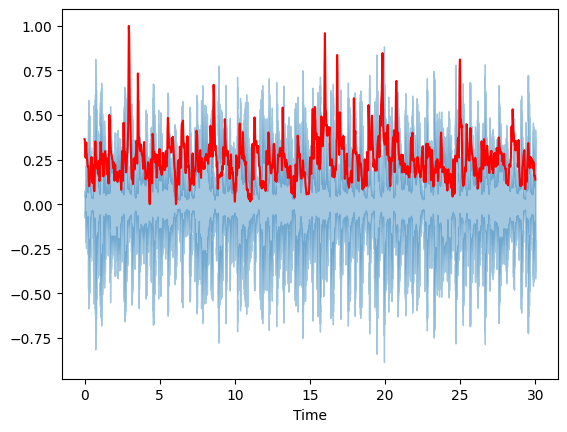

In [12]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return preprocessing.minmax_scale(y, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

<font color='red'>The Spectral Centroids are a bit complicated to explain, but to put it simply it is the weighted mean of the frequencies of sound. It represents the 'center of mass' for a song, and is very closely correlated with brightness in sound (namely songs that have stronger treble). For a blues song, that doesn't have too many high frequency moments, the center of mass is hard to make out because it remains consistent throughout the song. It would be much more noticable with brighter instruments like clarinets and violins.</font>


C:\Users\Cory Munselle\AppData\Local\Temp\ipykernel_22640\3425341608.py:1: FutureWarning: Pass y=[ 0.01732422  0.02660156  0.01762939 ... -0.04560303 -0.05106568
 -0.05417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]


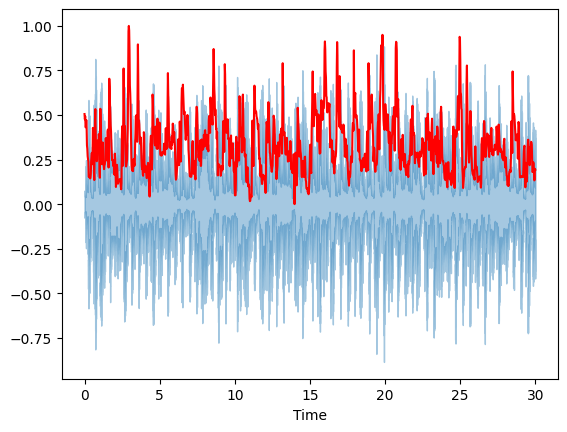

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

<font color='red'>This is the spectral rolloff of the signal, or the frequency below which a specified percentage of the total spectral energy lies. For example, if the percentage was 85%, the value would return how many frames had that contained less than 85% of the total spectral energy. This is harder to tie to a particular genre, but the idea is songs with more fluctuations will have a very different spectral rolloff value.</font>

C:\Users\Cory Munselle\AppData\Local\Temp\ipykernel_22640\326365929.py:1: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr=sr)


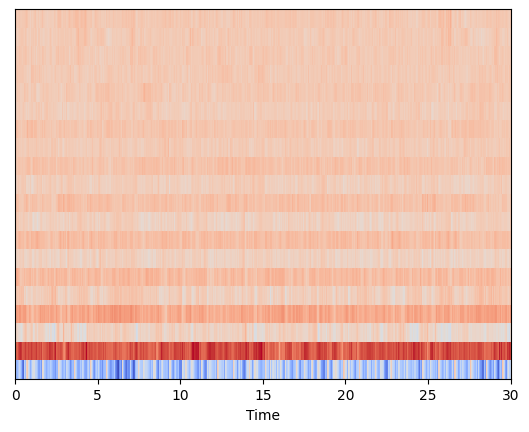

In [14]:
mfccs = librosa.feature.mfcc(y, sr=sr)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

C:\Users\Cory Munselle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\Cory Munselle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


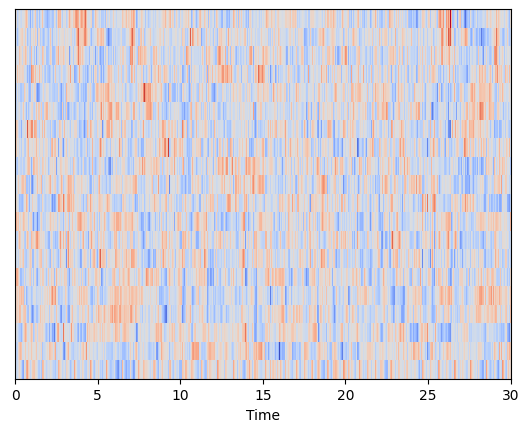

In [15]:
mfccs = preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<font color='red'>These are called MFCCs, or Mel-frequency cepstrum coefficients. They are a complex transformation of sound to give a representation of the short-term power spectrum of a sound, and are very useful for identifying vocals in audio. They mimic the human voice in a lot of ways. As a note, these graphs look legitimately terrible and don't represent much visually. The important part is the data itself.</font>

C:\Users\Cory Munselle\AppData\Local\Temp\ipykernel_22640\965399071.py:2: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)


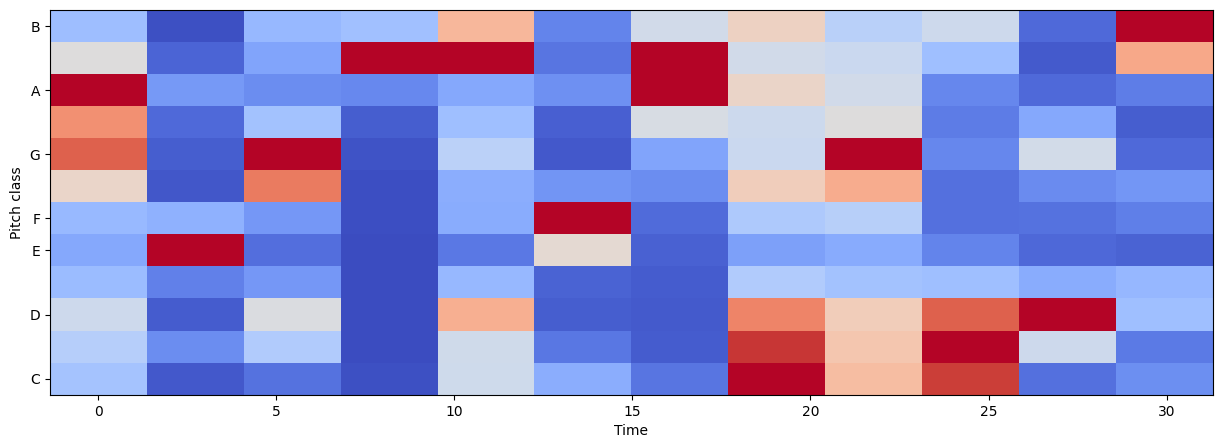

In [16]:
hop_length = 60000
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

<font color='red'>This is a chromagram, a graph that represents the various pitches that any song plays at a given time. The idea is simply to translate the frequency into one of the 12 semitones in an octave and plot it onto a heatmap, with the red colors being the pitch being hit. The closer you get to blue, the less present the note is. It's a great way to translate a spectrum into something that exists in a more traditional musical environment. </font>

In [4]:
musicData = pd.read_csv('features_30_sec.csv', header=0)

musicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

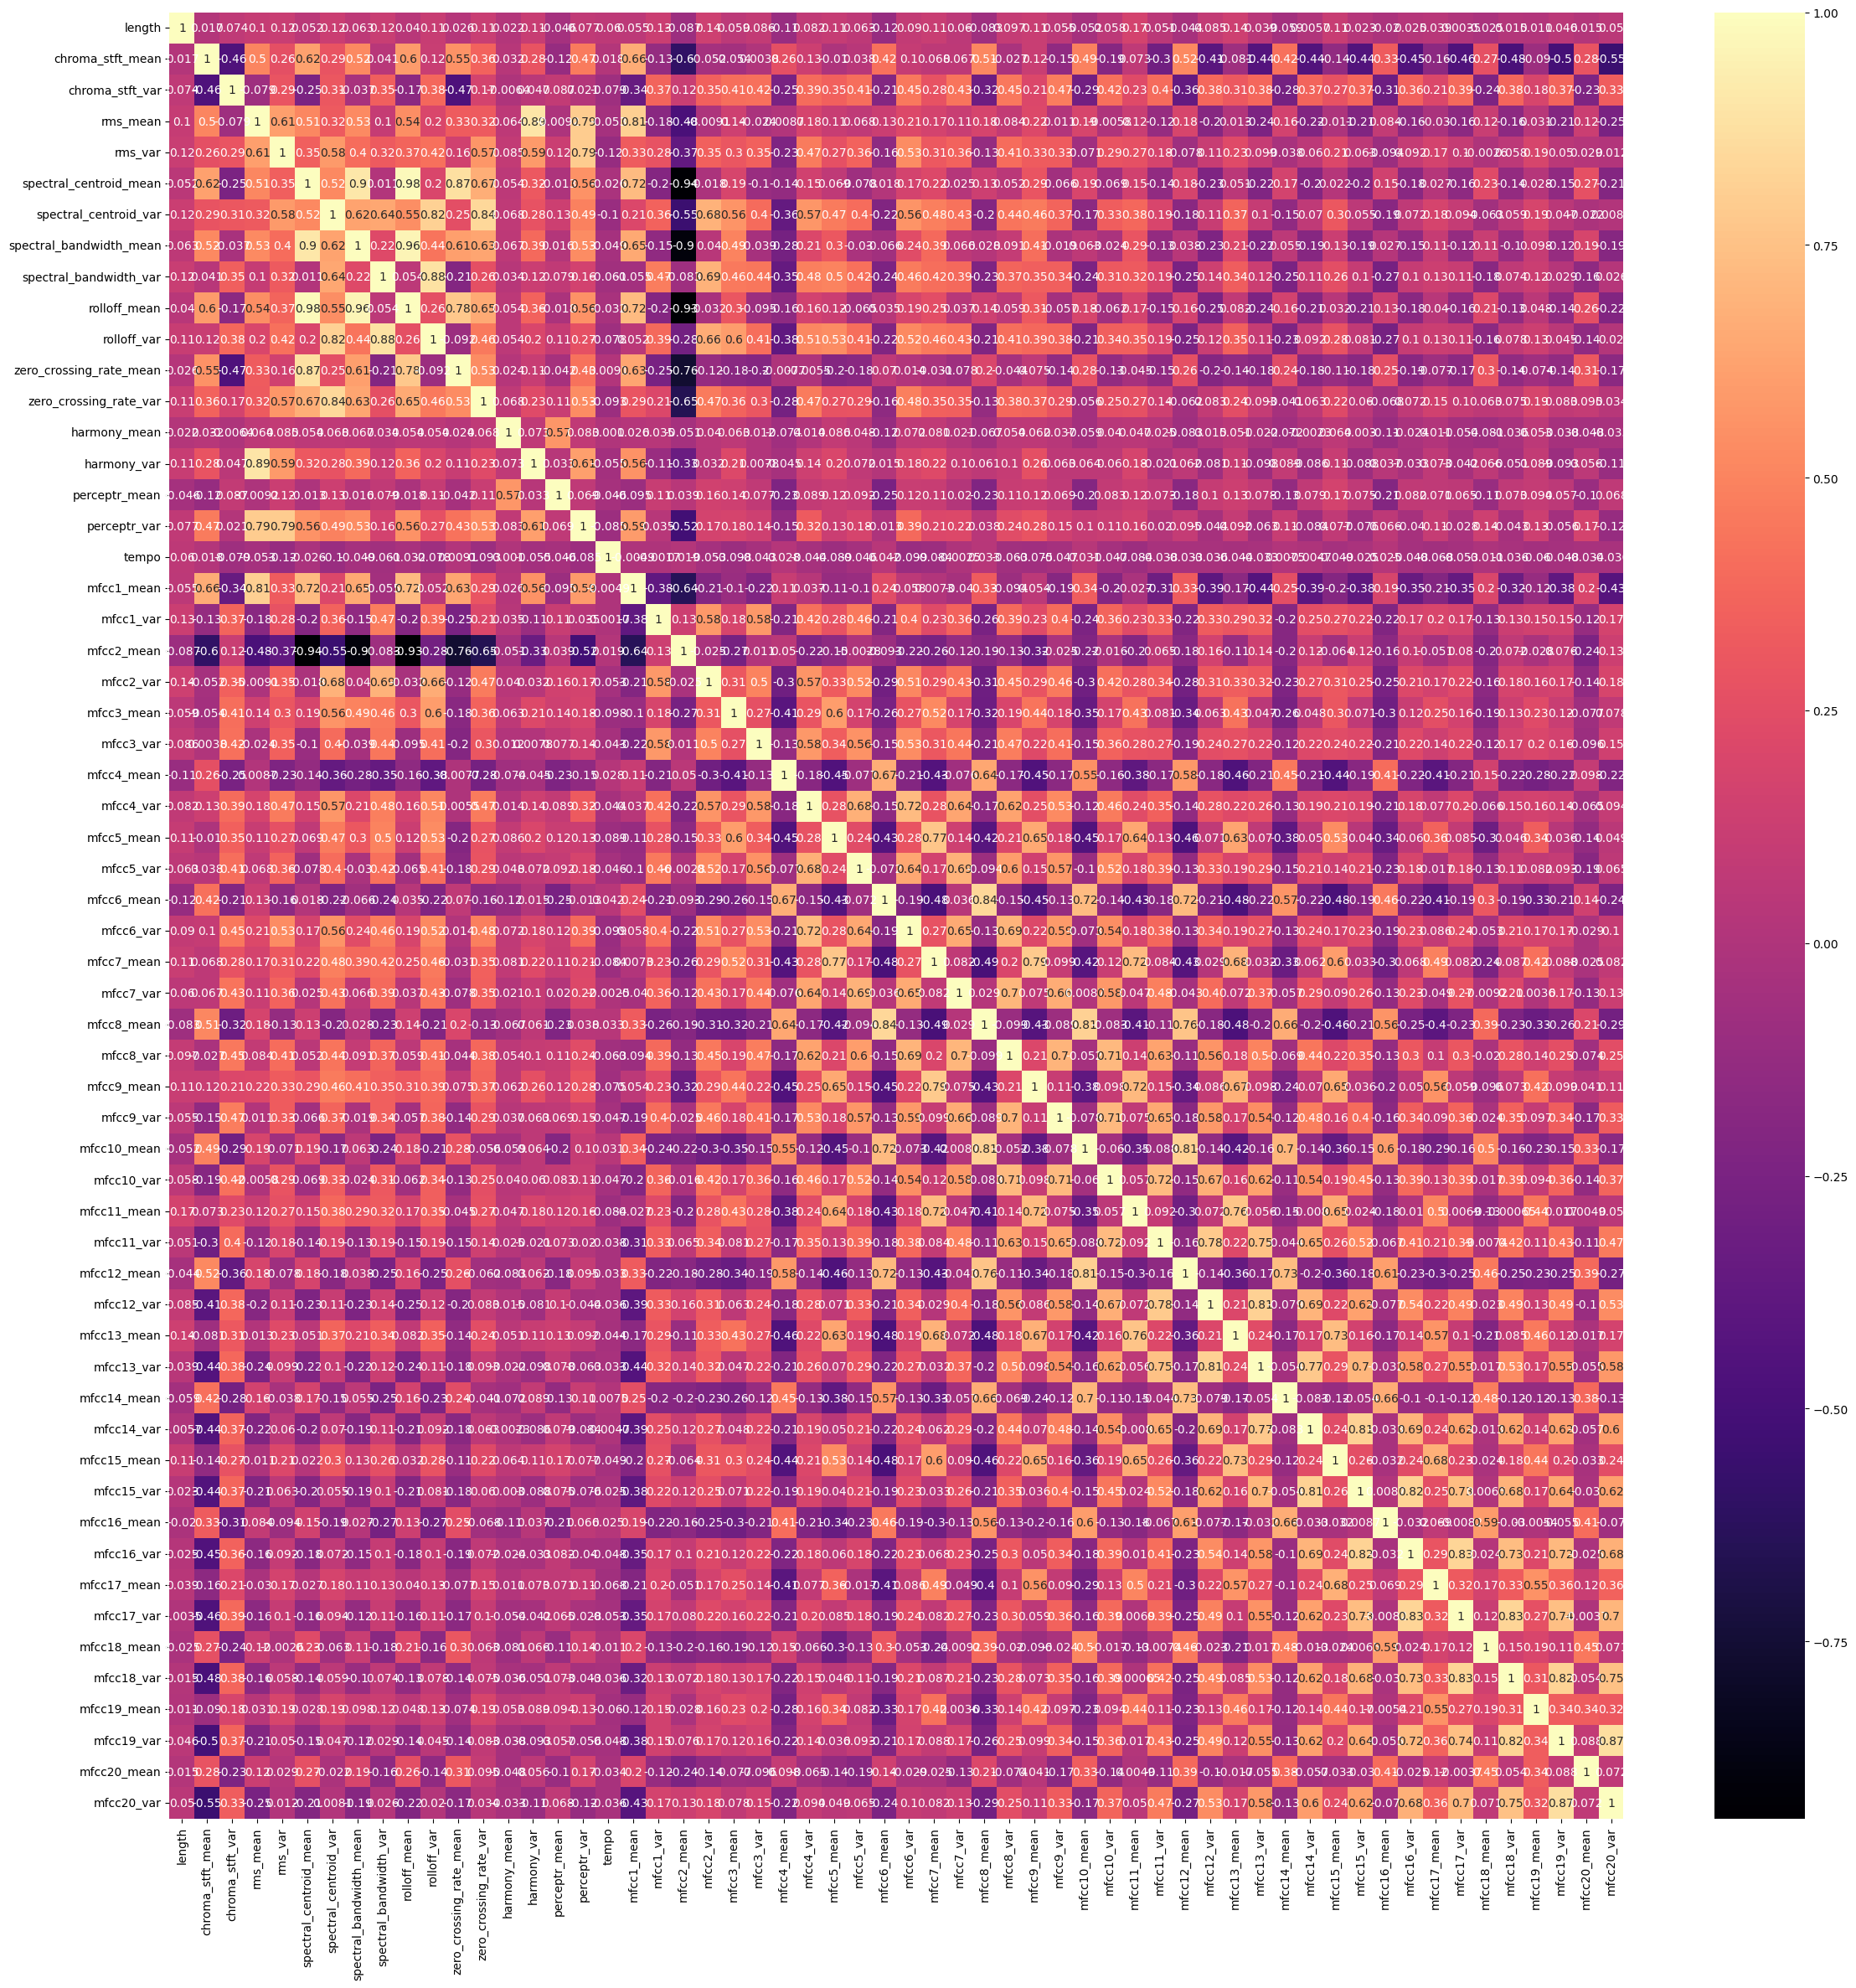

In [256]:
plt.figure(figsize=(28,28))
p=sns.heatmap(musicData.corr(), annot=True,cmap ='magma') 

<a id='part_1'></a>
## Part 1: Picking the right model 

I'm going to run three models: a [DNN](#DNN_1), a [CNN](#CNN_1), and an [RNN](#RNN_1) to see which one performs the best.

<a id='DNN_1'></a>
### Model 1: DNN

In [5]:
#We're going to encode the labels for future use. It may be useful, but I'll put it in a numpy array in case it isn't.
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(musicData['label'])

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [6]:
#Now to separate the rest and put it in a dataframe so we can make a train/test split on the data
#I'm removing these because I know they won't be used anywhere during training, and all three have pretty poor correlation as shown in the heatmap.

X = musicData.drop(columns=['label', 'filename', 'length'], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         1000 non-null   float64
 1   chroma_stft_var          1000 non-null   float64
 2   rms_mean                 1000 non-null   float64
 3   rms_var                  1000 non-null   float64
 4   spectral_centroid_mean   1000 non-null   float64
 5   spectral_centroid_var    1000 non-null   float64
 6   spectral_bandwidth_mean  1000 non-null   float64
 7   spectral_bandwidth_var   1000 non-null   float64
 8   rolloff_mean             1000 non-null   float64
 9   rolloff_var              1000 non-null   float64
 10  zero_crossing_rate_mean  1000 non-null   float64
 11  zero_crossing_rate_var   1000 non-null   float64
 12  harmony_mean             1000 non-null   float64
 13  harmony_var              1000 non-null   float64
 14  perceptr_mean            

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666, random_state=42, stratify=y_test)

print(len(X_train))
print(len(X_test))
print(len(X_val))

700
200
100


In [188]:
X_train.shape

(700, 57)

In [189]:
print(X_train['tempo'][0])

123.046875


In [195]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 57)                0         
                                                                 
 dense_136 (Dense)           (None, 300)               17400     
                                                                 
 dense_137 (Dense)           (None, 100)               30100     
                                                                 
 dense_138 (Dense)           (None, 10)                1010      
                                                                 
Total params: 48,510
Trainable params: 48,510
Non-trainable params: 0
_________________________________________________________________


In [196]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [197]:
np.random.seed(42)
history = model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
22/22 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0886 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/20
22/22 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/20
22/22 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/20
22/22 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/20
22/22 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/20
22/22 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/20
22/22 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/20
22/22 [==============================] - 0s 1ms/ste

Yup, good first start. Accuracy is very, _very_ bad. That's okay, this is literally just getting it to work in the first place. Now we can start in earnest!

In [198]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu"))
model.add(tf.keras.layers.Dense(300, activation="selu"))
model.add(tf.keras.layers.Dense(150, activation="selu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 57)                0         
                                                                 
 dense_139 (Dense)           (None, 500)               29000     
                                                                 
 dense_140 (Dense)           (None, 300)               150300    
                                                                 
 dense_141 (Dense)           (None, 150)               45150     
                                                                 
 dense_142 (Dense)           (None, 10)                1510      
                                                                 
Total params: 225,960
Trainable params: 225,960
Non-trainable params: 0
_________________________________________________________________


In [204]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [205]:
history = model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
22/22 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/500
22/22 [==============================] - 0s

22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 122/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 123/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 124/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 125/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 126/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 127/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 128/500
22/22 [==============================] - 

Epoch 181/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 182/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 183/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 184/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 185/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 186/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 187/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 188/500
22/22 [====================

Epoch 241/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 242/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 243/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 244/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 245/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 246/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 247/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 248/500
22/22 [====================

Epoch 301/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 302/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 303/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 304/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 305/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 306/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 307/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 308/500
22/22 [====================

Epoch 361/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 362/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 363/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 364/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 365/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 366/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 367/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 368/500
22/22 [====================

Epoch 421/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 422/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 423/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 424/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 425/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 426/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 427/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 428/500
22/22 [====================

Epoch 481/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 482/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 483/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 484/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 485/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 486/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 487/500
22/22 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 488/500
22/22 [====================

Even with the extra layers, different activation functions, and significantly increased epochs, we're still not getting any good results. Maybe the optimizer should be changed?

In [217]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu"))
model.add(tf.keras.layers.Dense(300, activation="selu"))
model.add(tf.keras.layers.Dense(150, activation="selu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 57)                0         
                                                                 
 dense_151 (Dense)           (None, 500)               29000     
                                                                 
 dense_152 (Dense)           (None, 300)               150300    
                                                                 
 dense_153 (Dense)           (None, 150)               45150     
                                                                 
 dense_154 (Dense)           (None, 10)                1510      
                                                                 
Total params: 225,960
Trainable params: 225,960
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [219]:
history = model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
22/22 [==============================] - 0s 6ms/step - loss: 73904.1328 - accuracy: 0.0829 - val_loss: 35089.2773 - val_accuracy: 0.1000
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 25203.6426 - accuracy: 0.1157 - val_loss: 17854.7695 - val_accuracy: 0.0600
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 18028.5312 - accuracy: 0.1457 - val_loss: 15968.2617 - val_accuracy: 0.1500
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 10920.4258 - accuracy: 0.1386 - val_loss: 10065.2461 - val_accuracy: 0.1700
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 7278.9087 - accuracy: 0.1714 - val_loss: 9706.9170 - val_accuracy: 0.1400
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 7270.2271 - accuracy: 0.1843 - val_loss: 9542.3486 - val_accuracy: 0.1400
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 6042.8970 - accuracy: 0.1857 - val_lo

22/22 [==============================] - 0s 2ms/step - loss: 2.2147 - accuracy: 0.1286 - val_loss: 12.1197 - val_accuracy: 0.1200
Epoch 114/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2158 - accuracy: 0.1100 - val_loss: 12.0958 - val_accuracy: 0.1200
Epoch 115/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2178 - accuracy: 0.1171 - val_loss: 12.1046 - val_accuracy: 0.1100
Epoch 116/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2160 - accuracy: 0.1243 - val_loss: 12.0963 - val_accuracy: 0.1200
Epoch 117/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2152 - accuracy: 0.1200 - val_loss: 12.1104 - val_accuracy: 0.1100
Epoch 118/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2157 - accuracy: 0.1200 - val_loss: 12.0971 - val_accuracy: 0.1200
Epoch 119/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2156 - accuracy: 0.1314 - val_loss: 12.1084 - val_accuracy: 0.1100
Epoch 

Epoch 170/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1965 - accuracy: 0.1271 - val_loss: 12.3203 - val_accuracy: 0.1300
Epoch 171/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1932 - accuracy: 0.1371 - val_loss: 12.3918 - val_accuracy: 0.1300
Epoch 172/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1952 - accuracy: 0.1386 - val_loss: 12.3341 - val_accuracy: 0.1300
Epoch 173/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1923 - accuracy: 0.1371 - val_loss: 12.3743 - val_accuracy: 0.1200
Epoch 174/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1885 - accuracy: 0.1214 - val_loss: 12.6686 - val_accuracy: 0.1300
Epoch 175/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1888 - accuracy: 0.1286 - val_loss: 13.0565 - val_accuracy: 0.1300
Epoch 176/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1997 - accuracy: 0.1443 - val_loss: 12.5225 - val_accuracy:

Epoch 227/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1676 - accuracy: 0.1443 - val_loss: 12.0164 - val_accuracy: 0.1400
Epoch 228/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2281 - accuracy: 0.1286 - val_loss: 11.0158 - val_accuracy: 0.1300
Epoch 229/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2074 - accuracy: 0.1143 - val_loss: 11.0676 - val_accuracy: 0.1300
Epoch 230/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2219 - accuracy: 0.1429 - val_loss: 12.4362 - val_accuracy: 0.1400
Epoch 231/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1871 - accuracy: 0.1214 - val_loss: 11.1690 - val_accuracy: 0.1300
Epoch 232/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2021 - accuracy: 0.1457 - val_loss: 11.1734 - val_accuracy: 0.1300
Epoch 233/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1998 - accuracy: 0.1371 - val_loss: 11.1303 - val_accuracy:

22/22 [==============================] - 0s 2ms/step - loss: 2.2954 - accuracy: 0.0786 - val_loss: 5.4504 - val_accuracy: 0.1000
Epoch 342/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2993 - accuracy: 0.0971 - val_loss: 5.4511 - val_accuracy: 0.1000
Epoch 343/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3009 - accuracy: 0.1029 - val_loss: 5.4516 - val_accuracy: 0.0900
Epoch 344/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2975 - accuracy: 0.0900 - val_loss: 5.4504 - val_accuracy: 0.1000
Epoch 345/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2998 - accuracy: 0.0900 - val_loss: 5.4506 - val_accuracy: 0.1000
Epoch 346/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2981 - accuracy: 0.1000 - val_loss: 5.4497 - val_accuracy: 0.1000
Epoch 347/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3023 - accuracy: 0.0943 - val_loss: 5.4513 - val_accuracy: 0.1000
Epoch 348/500

22/22 [==============================] - 0s 2ms/step - loss: 2.3082 - accuracy: 0.0757 - val_loss: 2.6480 - val_accuracy: 0.1000
Epoch 456/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3035 - accuracy: 0.0843 - val_loss: 2.6479 - val_accuracy: 0.1000
Epoch 457/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3020 - accuracy: 0.0786 - val_loss: 2.6485 - val_accuracy: 0.1000
Epoch 458/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3034 - accuracy: 0.1057 - val_loss: 2.6482 - val_accuracy: 0.1000
Epoch 459/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3008 - accuracy: 0.0757 - val_loss: 2.6493 - val_accuracy: 0.1000
Epoch 460/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3039 - accuracy: 0.0943 - val_loss: 2.6490 - val_accuracy: 0.0900
Epoch 461/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3041 - accuracy: 0.0743 - val_loss: 2.6484 - val_accuracy: 0.1000
Epoch 462/500

We're getting movement, but the accuracy certainly leaves something to be desired. It's certainly progress, if nothing else.

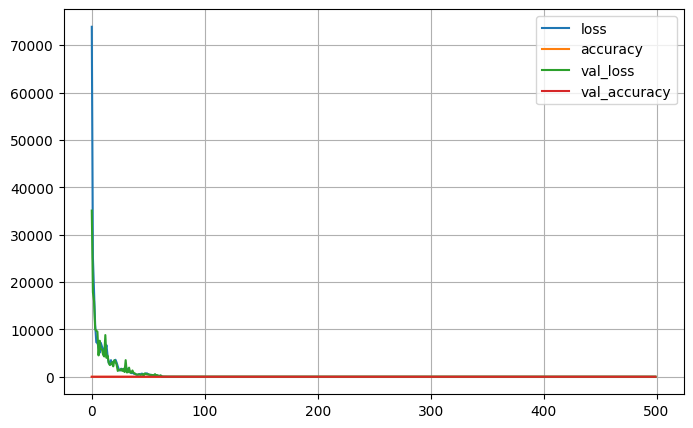

In [220]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

This confirms the issue, with accuracy flatlining and loss starting out astronomically high. I think we should make some more tweaks and maybe add some batch normalization.

In [224]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(300, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(150, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 57)                0         
                                                                 
 dense_159 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_67 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dense_160 (Dense)           (None, 300)               150300    
                                                                 
 batch_normalization_68 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_161 (Dense)           (None, 150)             

In [225]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [226]:
history = model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
22/22 [==============================] - 1s 7ms/step - loss: 2.1732 - accuracy: 0.2286 - val_loss: 7.6865 - val_accuracy: 0.1400
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 1.9070 - accuracy: 0.2943 - val_loss: 8.4950 - val_accuracy: 0.1500
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 1.8928 - accuracy: 0.3229 - val_loss: 7.8254 - val_accuracy: 0.1700
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 1.8255 - accuracy: 0.3143 - val_loss: 7.6257 - val_accuracy: 0.2200
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 1.8191 - accuracy: 0.3471 - val_loss: 8.4511 - val_accuracy: 0.3200
Epoch 6/500
22/22 [==============================] - 0s 3ms/step - loss: 1.8145 - accuracy: 0.3371 - val_loss: 9.2348 - val_accuracy: 0.2700
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 1.7714 - accuracy: 0.3629 - val_loss: 11.4590 - val_accuracy: 0.3200
Epoch 8/500


Epoch 115/500
22/22 [==============================] - 0s 2ms/step - loss: 1.2843 - accuracy: 0.5086 - val_loss: 773.5775 - val_accuracy: 0.3000
Epoch 116/500
22/22 [==============================] - 0s 2ms/step - loss: 1.3062 - accuracy: 0.5186 - val_loss: 794.2335 - val_accuracy: 0.4100
Epoch 117/500
22/22 [==============================] - 0s 2ms/step - loss: 1.2561 - accuracy: 0.5400 - val_loss: 817.9534 - val_accuracy: 0.4600
Epoch 118/500
22/22 [==============================] - 0s 3ms/step - loss: 1.2741 - accuracy: 0.5200 - val_loss: 798.7408 - val_accuracy: 0.3700
Epoch 119/500
22/22 [==============================] - 0s 2ms/step - loss: 1.1848 - accuracy: 0.5500 - val_loss: 705.8604 - val_accuracy: 0.4800
Epoch 120/500
22/22 [==============================] - 0s 3ms/step - loss: 1.2992 - accuracy: 0.4957 - val_loss: 675.1230 - val_accuracy: 0.4100
Epoch 121/500
22/22 [==============================] - 0s 3ms/step - loss: 1.2592 - accuracy: 0.5343 - val_loss: 659.4509 - val_ac

22/22 [==============================] - 0s 2ms/step - loss: 0.9544 - accuracy: 0.6371 - val_loss: 1633.5703 - val_accuracy: 0.4500
Epoch 228/500
22/22 [==============================] - 0s 2ms/step - loss: 0.9105 - accuracy: 0.6471 - val_loss: 1597.1865 - val_accuracy: 0.4000
Epoch 229/500
22/22 [==============================] - 0s 2ms/step - loss: 0.9520 - accuracy: 0.6086 - val_loss: 1578.6930 - val_accuracy: 0.3900
Epoch 230/500
22/22 [==============================] - 0s 2ms/step - loss: 0.8988 - accuracy: 0.6614 - val_loss: 1596.1492 - val_accuracy: 0.4300
Epoch 231/500
22/22 [==============================] - 0s 2ms/step - loss: 0.9679 - accuracy: 0.6286 - val_loss: 1531.7605 - val_accuracy: 0.4600
Epoch 232/500
22/22 [==============================] - 0s 2ms/step - loss: 0.9413 - accuracy: 0.6400 - val_loss: 1496.9330 - val_accuracy: 0.3200
Epoch 233/500
22/22 [==============================] - 0s 2ms/step - loss: 0.9747 - accuracy: 0.6400 - val_loss: 1447.7848 - val_accuracy:

22/22 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.7457 - val_loss: 2174.7209 - val_accuracy: 0.4300
Epoch 340/500
22/22 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.7343 - val_loss: 2039.0660 - val_accuracy: 0.4800
Epoch 341/500
22/22 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.7200 - val_loss: 1956.1442 - val_accuracy: 0.4800
Epoch 342/500
22/22 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.7300 - val_loss: 1871.7606 - val_accuracy: 0.3900
Epoch 343/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.7457 - val_loss: 1876.2238 - val_accuracy: 0.3600
Epoch 344/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.7457 - val_loss: 1875.5417 - val_accuracy: 0.3400
Epoch 345/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.7414 - val_loss: 1980.8036 - val_accuracy:

22/22 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8186 - val_loss: 2430.6699 - val_accuracy: 0.3700
Epoch 452/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.8114 - val_loss: 2421.4817 - val_accuracy: 0.3700
Epoch 453/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7714 - val_loss: 2215.6045 - val_accuracy: 0.4300
Epoch 454/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5436 - accuracy: 0.7843 - val_loss: 2266.2480 - val_accuracy: 0.4500
Epoch 455/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7843 - val_loss: 2128.7017 - val_accuracy: 0.3400
Epoch 456/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8157 - val_loss: 2170.8342 - val_accuracy: 0.4000
Epoch 457/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7957 - val_loss: 2173.9722 - val_accuracy:

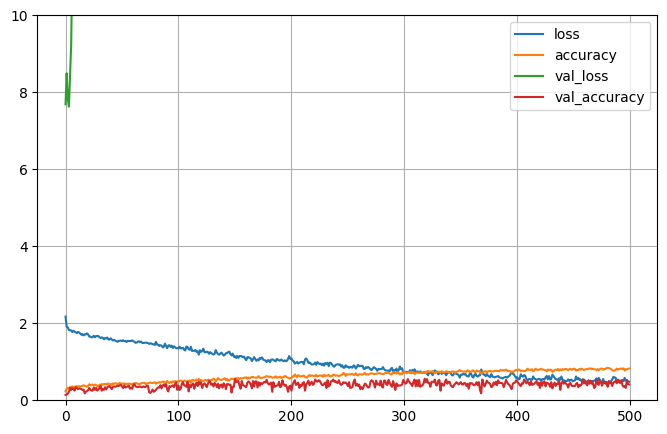

In [227]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10) # set the vertical range to [0-1]
plt.show()

Wow, that val_loss is incredibly volatile, and it's absurdly high. I don't really know what this indicates. I'm going to chalk it up to a bug and move on, because the accuracy and loss at least seems more promising, along with the val_accuracy.

In [237]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(300, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(150, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 57)                0         
                                                                 
 dense_171 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_76 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dropout_65 (Dropout)        (None, 500)               0         
                                                                 
 dense_172 (Dense)           (None, 300)               150300    
                                                                 
 batch_normalization_77 (Bat  (None, 300)              1200      
 chNormalization)                                    

In [238]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [239]:
history = model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
22/22 [==============================] - 1s 7ms/step - loss: 2.2827 - accuracy: 0.2329 - val_loss: 7.9123 - val_accuracy: 0.1400
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 2.0738 - accuracy: 0.2600 - val_loss: 4.8905 - val_accuracy: 0.0800
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 1.9885 - accuracy: 0.2514 - val_loss: 4.2345 - val_accuracy: 0.2500
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 1.9795 - accuracy: 0.2771 - val_loss: 4.6079 - val_accuracy: 0.2300
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 1.9332 - accuracy: 0.3014 - val_loss: 5.3118 - val_accuracy: 0.2600
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 1.9764 - accuracy: 0.2800 - val_loss: 5.0711 - val_accuracy: 0.2600
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 1.9016 - accuracy: 0.3043 - val_loss: 3.6888 - val_accuracy: 0.3200
Epoch 8/200
2

Epoch 115/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4649 - accuracy: 0.4371 - val_loss: 318.4770 - val_accuracy: 0.2900
Epoch 116/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4908 - accuracy: 0.4657 - val_loss: 316.0169 - val_accuracy: 0.3200
Epoch 117/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4698 - accuracy: 0.4614 - val_loss: 329.1307 - val_accuracy: 0.3700
Epoch 118/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4834 - accuracy: 0.4571 - val_loss: 328.4132 - val_accuracy: 0.3400
Epoch 119/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4719 - accuracy: 0.4557 - val_loss: 332.8538 - val_accuracy: 0.2500
Epoch 120/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4841 - accuracy: 0.4586 - val_loss: 334.8925 - val_accuracy: 0.1900
Epoch 121/200
22/22 [==============================] - 0s 3ms/step - loss: 1.4781 - accuracy: 0.4471 - val_loss: 334.1592 - val_ac

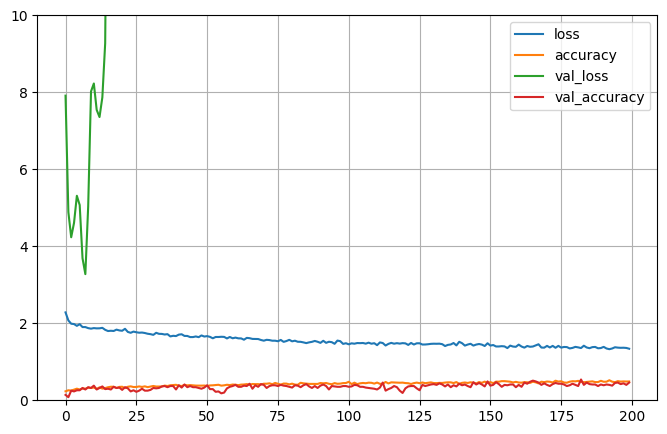

In [240]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10) # set the vertical range to [0-1]
plt.show()

Better val_loss, but it's still far too large. I'm going to add some dropout and see if that helps regulate things a bit.

In [244]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(400, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(300, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(150, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 57)                0         
                                                                 
 dense_180 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_83 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dropout_71 (Dropout)        (None, 500)               0         
                                                                 
 dense_181 (Dense)           (None, 400)               200400    
                                                                 
 batch_normalization_84 (Bat  (None, 400)              1600      
 chNormalization)                                    

In [245]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [246]:
history = model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
22/22 [==============================] - 1s 9ms/step - loss: 2.3830 - accuracy: 0.2057 - val_loss: 10.1279 - val_accuracy: 0.1300
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 2.0413 - accuracy: 0.2557 - val_loss: 8.9300 - val_accuracy: 0.1200
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 1.9060 - accuracy: 0.2829 - val_loss: 7.2821 - val_accuracy: 0.2100
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 1.8862 - accuracy: 0.2900 - val_loss: 6.4580 - val_accuracy: 0.2200
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 1.8859 - accuracy: 0.3171 - val_loss: 7.5678 - val_accuracy: 0.3000
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 1.8487 - accuracy: 0.2986 - val_loss: 7.9349 - val_accuracy: 0.3200
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 1.8045 - accuracy: 0.3357 - val_loss: 9.4873 - val_accuracy: 0.3100
Epoch 8/200


Epoch 115/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4375 - accuracy: 0.4486 - val_loss: 306.5861 - val_accuracy: 0.3400
Epoch 116/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4405 - accuracy: 0.4643 - val_loss: 300.9730 - val_accuracy: 0.3700
Epoch 117/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4436 - accuracy: 0.4486 - val_loss: 294.5777 - val_accuracy: 0.2600
Epoch 118/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4183 - accuracy: 0.4643 - val_loss: 278.7723 - val_accuracy: 0.4300
Epoch 119/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4128 - accuracy: 0.4629 - val_loss: 264.3660 - val_accuracy: 0.4500
Epoch 120/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4210 - accuracy: 0.4657 - val_loss: 243.6978 - val_accuracy: 0.3400
Epoch 121/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4670 - accuracy: 0.4314 - val_loss: 239.6964 - val_ac

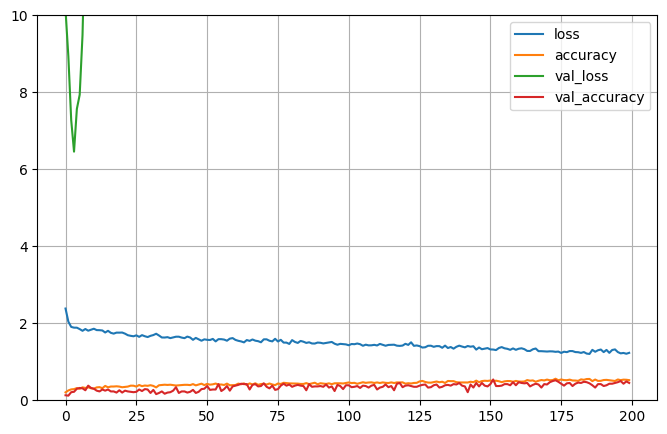

In [247]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10) # set the vertical range to [0-1]
plt.show()

Even worse than last time! I think some normalization will probably help fix this issue.

In [248]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

The data has been scaled to help normalize it a bit, so I'm going to try that same model again.

In [249]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(400, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(300, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(150, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 57)                0         
                                                                 
 dense_185 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_87 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dropout_74 (Dropout)        (None, 500)               0         
                                                                 
 dense_186 (Dense)           (None, 400)               200400    
                                                                 
 batch_normalization_88 (Bat  (None, 400)              1600      
 chNormalization)                                    

In [250]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00075),
              metrics=["accuracy"])

In [251]:
history = model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
22/22 [==============================] - 1s 9ms/step - loss: 1.5807 - accuracy: 0.4857 - val_loss: 1.0783 - val_accuracy: 0.6600
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9085 - accuracy: 0.6729 - val_loss: 0.8139 - val_accuracy: 0.7000
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.7271 - val_loss: 0.8398 - val_accuracy: 0.7400
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.7943 - val_loss: 0.9088 - val_accuracy: 0.7000
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.7943 - val_loss: 0.8388 - val_accuracy: 0.7200
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5706 - accuracy: 0.8129 - val_loss: 0.7862 - val_accuracy: 0.7900
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.8114 - val_loss: 0.8251 - val_accuracy: 0.7300
Epoch 8/200
2

Epoch 59/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.8685 - val_accuracy: 0.7600
Epoch 60/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9914 - val_loss: 1.0415 - val_accuracy: 0.7600
Epoch 61/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9829 - val_loss: 0.9132 - val_accuracy: 0.7500
Epoch 62/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9800 - val_loss: 1.1627 - val_accuracy: 0.7000
Epoch 63/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9714 - val_loss: 1.3990 - val_accuracy: 0.7000
Epoch 64/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9843 - val_loss: 1.2267 - val_accuracy: 0.7400
Epoch 65/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0587 - accuracy: 0.9757 - val_loss: 1.2833 - val_accuracy: 0.7400
Epoch 

22/22 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 1.4593 - val_accuracy: 0.7100
Epoch 174/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 1.4809 - val_accuracy: 0.7400
Epoch 175/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9929 - val_loss: 1.3634 - val_accuracy: 0.7000
Epoch 176/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9971 - val_loss: 1.3880 - val_accuracy: 0.7300
Epoch 177/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9986 - val_loss: 1.4618 - val_accuracy: 0.7400
Epoch 178/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 1.4195 - val_accuracy: 0.7500
Epoch 179/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 1.5058 - val_accuracy: 0.7300
Epoch 180/200

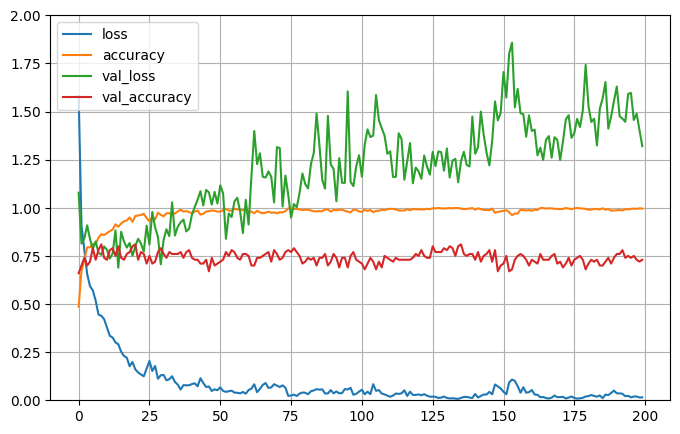

In [253]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

Wow, that's looking a lot better! The validation loss is still fluctuating, but way less than before. The accuracy has also increased across the board, even if it's likely overfitting right now. Lets test the model just to confirm.

In [254]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 1ms/step - loss: 1.5317 - accuracy: 0.7300


73% is already better than even the best results from my ExtraTrees classifier, so maybe we can tweak some more hyperparameters and get some better results.

In [258]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(400, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(300, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(150, activation="selu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 57)                0         
                                                                 
 dense_195 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_95 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dropout_81 (Dropout)        (None, 500)               0         
                                                                 
 dense_196 (Dense)           (None, 400)               200400    
                                                                 
 batch_normalization_96 (Bat  (None, 400)              1600      
 chNormalization)                                    

In [259]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00075),
              metrics=["accuracy"])

In [260]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
22/22 [==============================] - 1s 11ms/step - loss: 1.8126 - accuracy: 0.4229 - val_loss: 1.0476 - val_accuracy: 0.6000
Epoch 2/300
22/22 [==============================] - 0s 5ms/step - loss: 1.1789 - accuracy: 0.5943 - val_loss: 0.9004 - val_accuracy: 0.6600
Epoch 3/300
22/22 [==============================] - 0s 5ms/step - loss: 0.9464 - accuracy: 0.6671 - val_loss: 0.8283 - val_accuracy: 0.6800
Epoch 4/300
22/22 [==============================] - 0s 5ms/step - loss: 0.8843 - accuracy: 0.6814 - val_loss: 0.7600 - val_accuracy: 0.7300
Epoch 5/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7924 - accuracy: 0.7043 - val_loss: 0.7207 - val_accuracy: 0.7500
Epoch 6/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7566 - accuracy: 0.7486 - val_loss: 0.6679 - val_accuracy: 0.8100
Epoch 7/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 0.7714 - val_loss: 0.6893 - val_accuracy: 0.8000
Epoch 8/300


Epoch 59/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1323 - accuracy: 0.9486 - val_loss: 0.9311 - val_accuracy: 0.7300
Epoch 60/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1172 - accuracy: 0.9643 - val_loss: 1.0853 - val_accuracy: 0.7200
Epoch 61/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1699 - accuracy: 0.9371 - val_loss: 1.0376 - val_accuracy: 0.7300
Epoch 62/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1205 - accuracy: 0.9614 - val_loss: 1.0094 - val_accuracy: 0.7000
Epoch 63/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1106 - accuracy: 0.9743 - val_loss: 1.0511 - val_accuracy: 0.7200
Epoch 64/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1018 - accuracy: 0.9686 - val_loss: 1.0236 - val_accuracy: 0.7000
Epoch 65/300
22/22 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.9686 - val_loss: 1.0756 - val_accuracy: 0.7100
Epoch 

22/22 [==============================] - 0s 5ms/step - loss: 0.0505 - accuracy: 0.9829 - val_loss: 1.4494 - val_accuracy: 0.7100
Epoch 174/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0485 - accuracy: 0.9814 - val_loss: 1.3392 - val_accuracy: 0.7400
Epoch 175/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9800 - val_loss: 1.2912 - val_accuracy: 0.7300
Epoch 176/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0440 - accuracy: 0.9857 - val_loss: 1.1364 - val_accuracy: 0.7600
Epoch 177/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0658 - accuracy: 0.9800 - val_loss: 1.2584 - val_accuracy: 0.7200
Epoch 178/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9829 - val_loss: 1.2570 - val_accuracy: 0.7700
Epoch 179/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0755 - accuracy: 0.9786 - val_loss: 1.4138 - val_accuracy: 0.7600
Epoch 180/300

22/22 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9914 - val_loss: 1.2238 - val_accuracy: 0.7500
Epoch 288/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 1.2974 - val_accuracy: 0.7300
Epoch 289/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9857 - val_loss: 1.2445 - val_accuracy: 0.7400
Epoch 290/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0630 - accuracy: 0.9829 - val_loss: 1.1953 - val_accuracy: 0.7400
Epoch 291/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 1.3405 - val_accuracy: 0.7700
Epoch 292/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0454 - accuracy: 0.9829 - val_loss: 1.6607 - val_accuracy: 0.7200
Epoch 293/300
22/22 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9814 - val_loss: 1.5763 - val_accuracy: 0.7300
Epoch 294/300

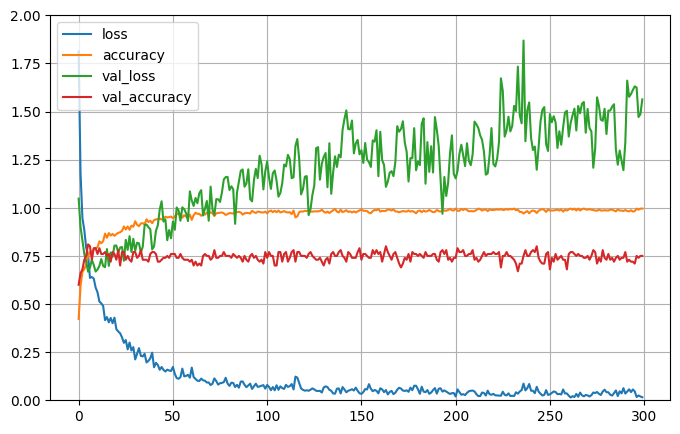

In [263]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

Much the same as before. Lets try a different approach...

In [277]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="selu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(400, activation="selu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(300, activation="selu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(150, activation="selu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 57)                0         
                                                                 
 dense_215 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_111 (Ba  (None, 500)              2000      
 tchNormalization)                                               
                                                                 
 dropout_94 (Dropout)        (None, 500)               0         
                                                                 
 dense_216 (Dense)           (None, 400)               200400    
                                                                 
 batch_normalization_112 (Ba  (None, 400)              1600      
 tchNormalization)                                   

In [278]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [279]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
22/22 [==============================] - 1s 10ms/step - loss: 12.3498 - accuracy: 0.4443 - val_loss: 11.3419 - val_accuracy: 0.6700
Epoch 2/300
22/22 [==============================] - 0s 4ms/step - loss: 11.0175 - accuracy: 0.5886 - val_loss: 10.4546 - val_accuracy: 0.6500
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 9.9218 - accuracy: 0.6843 - val_loss: 9.4858 - val_accuracy: 0.6700
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 9.0190 - accuracy: 0.6957 - val_loss: 8.5111 - val_accuracy: 0.7400
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 8.1963 - accuracy: 0.7100 - val_loss: 7.8726 - val_accuracy: 0.6700
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 7.3881 - accuracy: 0.7171 - val_loss: 7.1294 - val_accuracy: 0.7200
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 6.6476 - accuracy: 0.7614 - val_loss: 6.4282 - val_accuracy: 0.6900
Epoch 8/

Epoch 59/300
22/22 [==============================] - 0s 4ms/step - loss: 1.1418 - accuracy: 0.7957 - val_loss: 1.5374 - val_accuracy: 0.6400
Epoch 60/300
22/22 [==============================] - 0s 4ms/step - loss: 1.1683 - accuracy: 0.7929 - val_loss: 1.5050 - val_accuracy: 0.6500
Epoch 61/300
22/22 [==============================] - 0s 4ms/step - loss: 1.1693 - accuracy: 0.7971 - val_loss: 1.5049 - val_accuracy: 0.6900
Epoch 62/300
22/22 [==============================] - 0s 4ms/step - loss: 1.0829 - accuracy: 0.8271 - val_loss: 1.6937 - val_accuracy: 0.6300
Epoch 63/300
22/22 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.8186 - val_loss: 1.4356 - val_accuracy: 0.6900
Epoch 64/300
22/22 [==============================] - 0s 4ms/step - loss: 1.1655 - accuracy: 0.7786 - val_loss: 1.4718 - val_accuracy: 0.6500
Epoch 65/300
22/22 [==============================] - 0s 4ms/step - loss: 1.0823 - accuracy: 0.7829 - val_loss: 1.4124 - val_accuracy: 0.6900
Epoch 

22/22 [==============================] - 0s 4ms/step - loss: 0.9253 - accuracy: 0.8471 - val_loss: 1.3328 - val_accuracy: 0.6600
Epoch 174/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9445 - accuracy: 0.8571 - val_loss: 1.5044 - val_accuracy: 0.6800
Epoch 175/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9789 - accuracy: 0.8257 - val_loss: 1.3462 - val_accuracy: 0.7400
Epoch 176/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9431 - accuracy: 0.8300 - val_loss: 1.3995 - val_accuracy: 0.6800
Epoch 177/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9749 - accuracy: 0.8443 - val_loss: 1.4948 - val_accuracy: 0.6800
Epoch 178/300
22/22 [==============================] - 0s 4ms/step - loss: 1.0419 - accuracy: 0.8200 - val_loss: 1.6629 - val_accuracy: 0.6500
Epoch 179/300
22/22 [==============================] - 0s 4ms/step - loss: 1.0283 - accuracy: 0.8129 - val_loss: 1.5885 - val_accuracy: 0.6700
Epoch 180/300

22/22 [==============================] - 0s 4ms/step - loss: 0.9345 - accuracy: 0.8557 - val_loss: 1.6666 - val_accuracy: 0.7000
Epoch 288/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9275 - accuracy: 0.8429 - val_loss: 1.5800 - val_accuracy: 0.7000
Epoch 289/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9160 - accuracy: 0.8614 - val_loss: 1.5787 - val_accuracy: 0.7000
Epoch 290/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8566 - accuracy: 0.8814 - val_loss: 1.4375 - val_accuracy: 0.6900
Epoch 291/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8767 - accuracy: 0.8571 - val_loss: 1.4503 - val_accuracy: 0.7200
Epoch 292/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8678 - accuracy: 0.8571 - val_loss: 1.5909 - val_accuracy: 0.7100
Epoch 293/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9247 - accuracy: 0.8586 - val_loss: 1.4836 - val_accuracy: 0.6700
Epoch 294/300

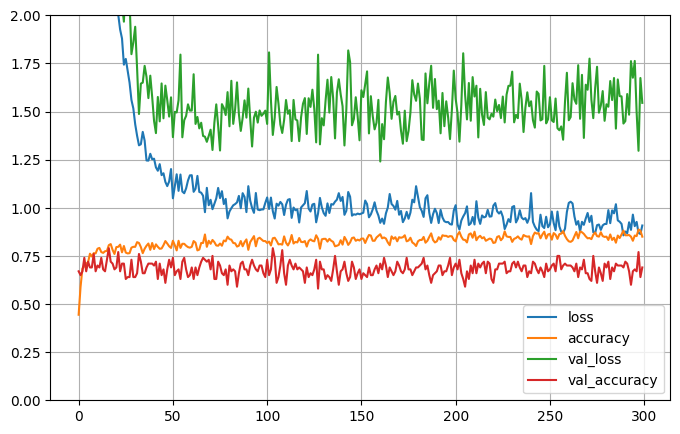

In [280]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

Adding regularizers has only made it more unstable it seems, so I think it's best if we go back to the previous method. Lets see if adjusting dropout a bit will help with flexibility.

In [287]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(150, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_41 (Flatten)        (None, 57)                0         
                                                                 
 dense_225 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_119 (Ba  (None, 500)              2000      
 tchNormalization)                                               
                                                                 
 dense_226 (Dense)           (None, 400)               200400    
                                                                 
 batch_normalization_120 (Ba  (None, 400)              1600      
 tchNormalization)                                               
                                                                 
 dense_227 (Dense)           (None, 300)             

In [288]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [289]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, amsgrad=True),
              metrics=["accuracy"])

In [290]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 8ms/step - loss: 3.0027 - accuracy: 0.1386 - val_loss: 2.3006 - val_accuracy: 0.0800
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 2.8512 - accuracy: 0.1543 - val_loss: 2.2804 - val_accuracy: 0.1400
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 2.7779 - accuracy: 0.1757 - val_loss: 2.2551 - val_accuracy: 0.1500
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 2.6309 - accuracy: 0.2086 - val_loss: 2.2225 - val_accuracy: 0.1700
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 2.5285 - accuracy: 0.2243 - val_loss: 2.1829 - val_accuracy: 0.2200
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 2.3382 - accuracy: 0.2543 - val_loss: 2.1364 - val_accuracy: 0.2600
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 2.2646 - accuracy: 0.2757 - val_loss: 2.0832 - val_accuracy: 0.2900
Epoch 8/300
2

Epoch 59/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8653 - accuracy: 0.7157 - val_loss: 1.0498 - val_accuracy: 0.7000
Epoch 60/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7962 - accuracy: 0.7429 - val_loss: 1.0464 - val_accuracy: 0.7000
Epoch 61/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7783 - accuracy: 0.7300 - val_loss: 1.0419 - val_accuracy: 0.7000
Epoch 62/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7473 - accuracy: 0.7586 - val_loss: 1.0375 - val_accuracy: 0.7000
Epoch 63/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7500 - accuracy: 0.7571 - val_loss: 1.0308 - val_accuracy: 0.6900
Epoch 64/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.7857 - val_loss: 1.0238 - val_accuracy: 0.6900
Epoch 65/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.8000 - val_loss: 1.0202 - val_accuracy: 0.6900
Epoch 

22/22 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.9457 - val_loss: 0.8266 - val_accuracy: 0.7800
Epoch 174/300
22/22 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.9486 - val_loss: 0.8234 - val_accuracy: 0.7800
Epoch 175/300
22/22 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9529 - val_loss: 0.8231 - val_accuracy: 0.7800
Epoch 176/300
22/22 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.9443 - val_loss: 0.8222 - val_accuracy: 0.7800
Epoch 177/300
22/22 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.9443 - val_loss: 0.8231 - val_accuracy: 0.7800
Epoch 178/300
22/22 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.9471 - val_loss: 0.8217 - val_accuracy: 0.7800
Epoch 179/300
22/22 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.9571 - val_loss: 0.8207 - val_accuracy: 0.7800
Epoch 180/300

22/22 [==============================] - 0s 3ms/step - loss: 0.1185 - accuracy: 0.9843 - val_loss: 0.7923 - val_accuracy: 0.8000
Epoch 288/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9843 - val_loss: 0.7939 - val_accuracy: 0.8000
Epoch 289/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1075 - accuracy: 0.9886 - val_loss: 0.7936 - val_accuracy: 0.8000
Epoch 290/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1316 - accuracy: 0.9829 - val_loss: 0.7942 - val_accuracy: 0.8000
Epoch 291/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.9914 - val_loss: 0.7946 - val_accuracy: 0.8000
Epoch 292/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9800 - val_loss: 0.7947 - val_accuracy: 0.8000
Epoch 293/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9714 - val_loss: 0.7954 - val_accuracy: 0.8000
Epoch 294/300

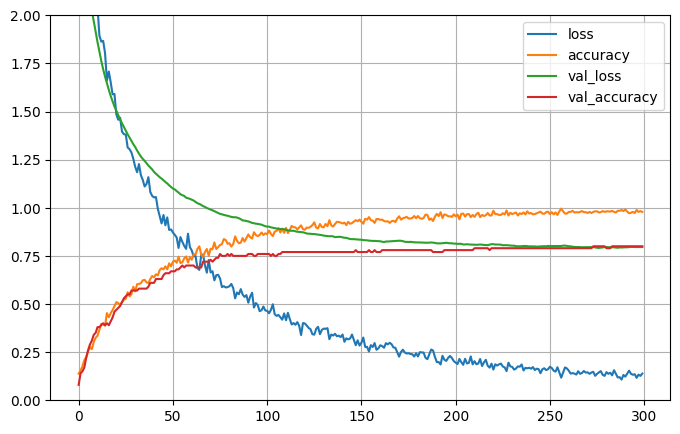

In [291]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [292]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 1ms/step - loss: 0.8890 - accuracy: 0.7200


The validation loss and accuracy have both improved a decent amount, but the evaluation didn't turn out the best unfortunately. I'm going to try a few more things, but I think I can make something happen.

In [298]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(150, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_43 (Flatten)        (None, 57)                0         
                                                                 
 dense_235 (Dense)           (None, 500)               29000     
                                                                 
 batch_normalization_127 (Ba  (None, 500)              2000      
 tchNormalization)                                               
                                                                 
 dropout_103 (Dropout)       (None, 500)               0         
                                                                 
 dense_236 (Dense)           (None, 400)               200400    
                                                                 
 batch_normalization_128 (Ba  (None, 400)              1600      
 tchNormalization)                                   

In [299]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [300]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, amsgrad=True),
              metrics=["accuracy"])

In [301]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 9ms/step - loss: 2.2949 - accuracy: 0.2800 - val_loss: 2.0269 - val_accuracy: 0.4100
Epoch 2/300
22/22 [==============================] - 0s 4ms/step - loss: 1.3302 - accuracy: 0.5414 - val_loss: 1.8117 - val_accuracy: 0.5900
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 1.0815 - accuracy: 0.6143 - val_loss: 1.6366 - val_accuracy: 0.6800
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8504 - accuracy: 0.7271 - val_loss: 1.4584 - val_accuracy: 0.6800
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7642 - accuracy: 0.7343 - val_loss: 1.3315 - val_accuracy: 0.6900
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.7629 - val_loss: 1.2116 - val_accuracy: 0.6800
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.7557 - val_loss: 1.1346 - val_accuracy: 0.6800
Epoch 8/300
2

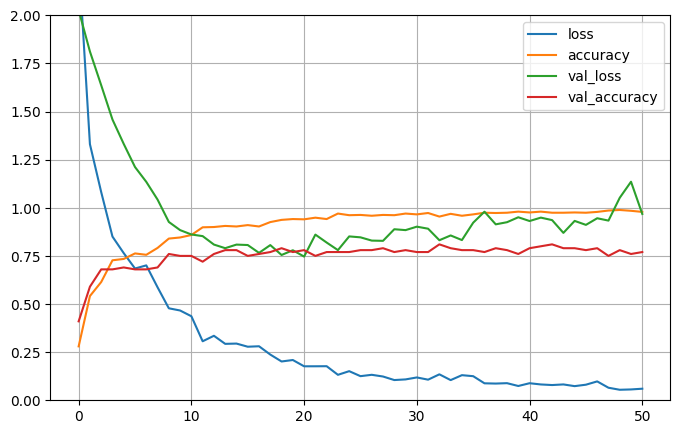

In [302]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [303]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 1ms/step - loss: 0.8526 - accuracy: 0.7800


78% is an improvement, to be sure, but progress is starting to slow down so lets try a few more models and then we'll move onto the next model type.

In [317]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.35))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_48 (Flatten)        (None, 57)                0         
                                                                 
 dense_256 (Dense)           (None, 1024)              59392     
                                                                 
 batch_normalization_143 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dense_257 (Dense)           (None, 512)               524800    
                                                                 
 batch_normalization_144 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dense_258 (Dense)           (None, 256)             

In [318]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [319]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00075, amsgrad=True),
              metrics=["accuracy"])

In [320]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 11ms/step - loss: 1.8423 - accuracy: 0.4343 - val_loss: 1.7976 - val_accuracy: 0.4700
Epoch 2/300
22/22 [==============================] - 0s 6ms/step - loss: 0.8997 - accuracy: 0.6943 - val_loss: 1.5831 - val_accuracy: 0.6600
Epoch 3/300
22/22 [==============================] - 0s 6ms/step - loss: 0.5936 - accuracy: 0.8043 - val_loss: 1.4355 - val_accuracy: 0.6900
Epoch 4/300
22/22 [==============================] - 0s 6ms/step - loss: 0.4608 - accuracy: 0.8557 - val_loss: 1.3279 - val_accuracy: 0.7100
Epoch 5/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3354 - accuracy: 0.9071 - val_loss: 1.2200 - val_accuracy: 0.7100
Epoch 6/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2858 - accuracy: 0.9057 - val_loss: 1.1044 - val_accuracy: 0.7300
Epoch 7/300
22/22 [==============================] - 0s 6ms/step - loss: 0.1958 - accuracy: 0.9471 - val_loss: 1.0052 - val_accuracy: 0.7100
Epoch 8/300


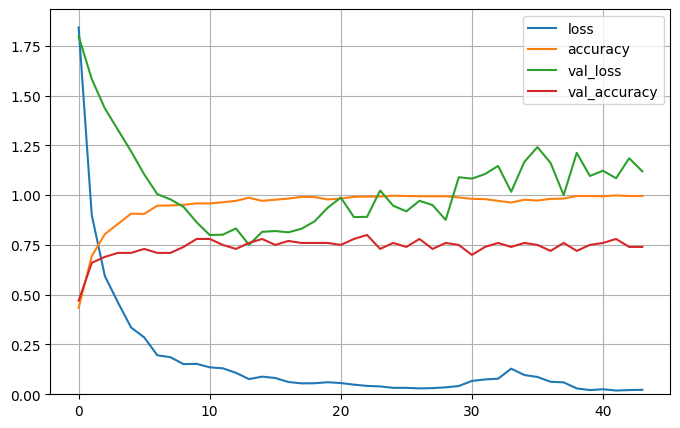

In [322]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, ) # set the vertical range to [0-1]
plt.show()

In [324]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_49 (Flatten)        (None, 57)                0         
                                                                 
 dense_261 (Dense)           (None, 1024)              59392     
                                                                 
 batch_normalization_147 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_111 (Dropout)       (None, 1024)              0         
                                                                 
 dense_262 (Dense)           (None, 512)               524800    
                                                                 
 batch_normalization_148 (Ba  (None, 512)              2048      
 tchNormalization)                                   

In [325]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),
              metrics=["accuracy"])

In [326]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 12ms/step - loss: 1.7272 - accuracy: 0.4629 - val_loss: 1.7233 - val_accuracy: 0.5200
Epoch 2/300
22/22 [==============================] - 0s 7ms/step - loss: 0.9016 - accuracy: 0.6986 - val_loss: 1.4347 - val_accuracy: 0.6700
Epoch 3/300
22/22 [==============================] - 0s 7ms/step - loss: 0.6462 - accuracy: 0.7757 - val_loss: 1.3153 - val_accuracy: 0.6900
Epoch 4/300
22/22 [==============================] - 0s 7ms/step - loss: 0.5067 - accuracy: 0.8357 - val_loss: 1.2099 - val_accuracy: 0.7300
Epoch 5/300
22/22 [==============================] - 0s 7ms/step - loss: 0.4598 - accuracy: 0.8429 - val_loss: 1.0964 - val_accuracy: 0.7300
Epoch 6/300
22/22 [==============================] - 0s 7ms/step - loss: 0.3359 - accuracy: 0.8986 - val_loss: 0.9943 - val_accuracy: 0.7400
Epoch 7/300
22/22 [==============================] - 0s 7ms/step - loss: 0.2826 - accuracy: 0.9086 - val_loss: 0.9303 - val_accuracy: 0.7400
Epoch 8/300


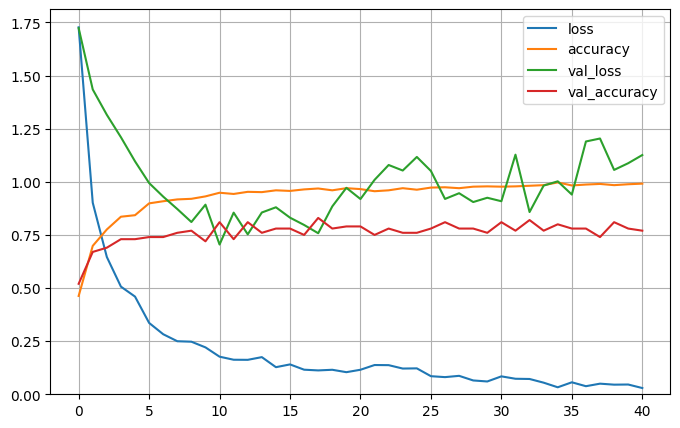

In [327]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, ) # set the vertical range to [0-1]
plt.show()

In [328]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 0.7763 - accuracy: 0.7450


In [353]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_54 (Flatten)        (None, 57)                0         
                                                                 
 dense_286 (Dense)           (None, 1024)              59392     
                                                                 
 batch_normalization_167 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_131 (Dropout)       (None, 1024)              0         
                                                                 
 dense_287 (Dense)           (None, 512)               524800    
                                                                 
 batch_normalization_168 (Ba  (None, 512)              2048      
 tchNormalization)                                   

In [354]:
# This function keeps the initial learning rate for the first five epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [355]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [356]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001, amsgrad=True),
              metrics=["accuracy"])

In [357]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/300
22/22 [==============================] - 1s 11ms/step - loss: 1.8357 - accuracy: 0.4143 - val_loss: 1.7196 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/300
22/22 [==============================] - 0s 6ms/step - loss: 0.9121 - accuracy: 0.6771 - val_loss: 1.4968 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 3/300
22/22 [==============================] - 0s 7ms/step - loss: 0.6981 - accuracy: 0.7700 - val_loss: 1.3929 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 4/300
22/22 [==============================] - 0s 6ms/step - loss: 0.5186 - accuracy: 0.8129 - val_loss: 1.2691 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 5/300
22/22 [==============================] - 0s 6ms/step - loss: 0.4421 - accuracy: 0.8600 - val_loss: 1.1804 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 6/300
22/22 [==============================] - 0s 6ms/step - loss: 0.3930 - accuracy: 0.8771 - val_loss: 1.0596 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 7/300
22/22 [==============================] - 0s 6ms/step - loss: 0.

In [358]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 0.8001 - accuracy: 0.7500


I'm going to call it here and move onto the next model type. 78% is already an improvement, and with some luck I should hopefully be able to achieve better results.

<a id='CNN_1'></a>
### Model 2: CNN

In [381]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666, random_state=42, stratify=y_test)

print(len(X_train))
print(len(X_test))
print(len(X_val))

700
200
100


Because a CNN requires a 3D shape, we need to modify our arrays to accommodate the new shape before we can train a CNN.

In [382]:
X_train_cnn = X_train.to_numpy()[..., np.newaxis]
X_test_cnn = X_test.to_numpy()[..., np.newaxis]
X_val_cnn = X_val.to_numpy()[..., np.newaxis]

In [383]:
input_shape = (X_train_cnn.shape[1], X_train_cnn.shape[2], 1)
print(input_shape)

(57, 1, 1)


In [384]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (3,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (3,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (2,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 55, 1, 512)        2048      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_183 (Ba  (None, 28, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 1, 256)        393472    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 1, 256)       0         
 g2D)                                                            
                                                     

In [385]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),
              metrics=["accuracy"])

In [386]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 22ms/step - loss: 2.7210 - accuracy: 0.2114 - val_loss: 6.5306 - val_accuracy: 0.2000
Epoch 2/300
22/22 [==============================] - 0s 17ms/step - loss: 1.9024 - accuracy: 0.3271 - val_loss: 3.1939 - val_accuracy: 0.2400
Epoch 3/300
22/22 [==============================] - 0s 17ms/step - loss: 1.8166 - accuracy: 0.3557 - val_loss: 2.9662 - val_accuracy: 0.1600
Epoch 4/300
22/22 [==============================] - 0s 17ms/step - loss: 1.7806 - accuracy: 0.3643 - val_loss: 2.4287 - val_accuracy: 0.2800
Epoch 5/300
22/22 [==============================] - 0s 17ms/step - loss: 1.7853 - accuracy: 0.3629 - val_loss: 1.9932 - val_accuracy: 0.3100
Epoch 6/300
22/22 [==============================] - 0s 17ms/step - loss: 1.7025 - accuracy: 0.3743 - val_loss: 1.8455 - val_accuracy: 0.4000
Epoch 7/300
22/22 [==============================] - 0s 17ms/step - loss: 1.6315 - accuracy: 0.4014 - val_loss: 1.8123 - val_accuracy: 0.3300
Epoch 

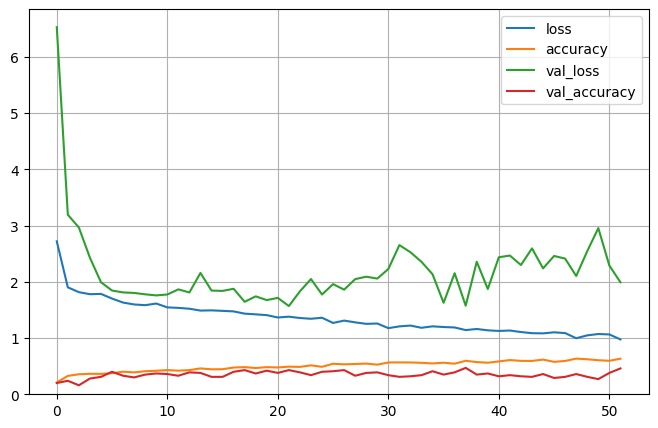

In [387]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, ) # set the vertical range to [0-1]
plt.show()

Interesting first start. It's not bad, but it definitely still needs some work. I'm gonna work on some hyperparameters and the overall layout of the model to see if I can get better results.

In [388]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (3,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (3,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (2,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 55, 1, 512)        2048      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 28, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_186 (Ba  (None, 28, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 26, 1, 256)        393472    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 1, 256)       0         
 g2D)                                                            
                                                     

In [389]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [390]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 21ms/step - loss: 2.5729 - accuracy: 0.2357 - val_loss: 10.4603 - val_accuracy: 0.1500
Epoch 2/300
22/22 [==============================] - 0s 16ms/step - loss: 1.9949 - accuracy: 0.2914 - val_loss: 4.0062 - val_accuracy: 0.2800
Epoch 3/300
22/22 [==============================] - 0s 16ms/step - loss: 1.9464 - accuracy: 0.3214 - val_loss: 2.6313 - val_accuracy: 0.3100
Epoch 4/300
22/22 [==============================] - 0s 17ms/step - loss: 1.8878 - accuracy: 0.3329 - val_loss: 2.1634 - val_accuracy: 0.4000
Epoch 5/300
22/22 [==============================] - 0s 16ms/step - loss: 1.8214 - accuracy: 0.3386 - val_loss: 18.1283 - val_accuracy: 0.1000
Epoch 6/300
22/22 [==============================] - 0s 16ms/step - loss: 1.7978 - accuracy: 0.3614 - val_loss: 2.0505 - val_accuracy: 0.2900
Epoch 7/300
22/22 [==============================] - 0s 17ms/step - loss: 1.8200 - accuracy: 0.3671 - val_loss: 1.6389 - val_accuracy: 0.4100
Epoc

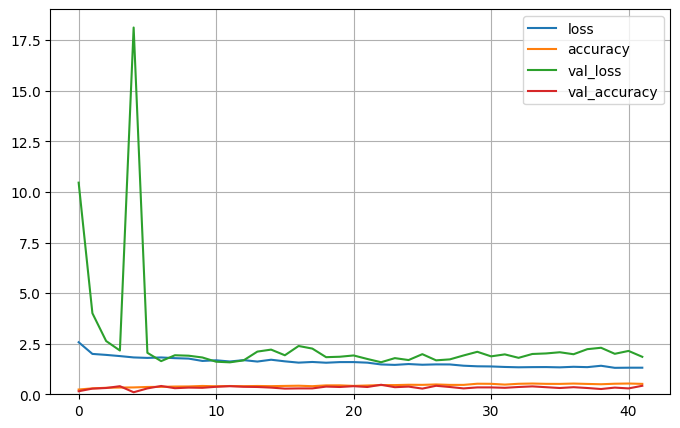

In [391]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, ) # set the vertical range to [0-1]
plt.show()

In [400]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Conv2D(128, (3,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 54, 1, 512)        2560      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 27, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_199 (Ba  (None, 27, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 conv2d_34 (Conv2D)          (None, 24, 1, 256)        524544    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 1, 256)       0         
 g2D)                                                            
                                                     

In [401]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [402]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, batch_size=16, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
44/44 [==============================] - 1s 13ms/step - loss: 3.4706 - accuracy: 0.2257 - val_loss: 8.3469 - val_accuracy: 0.1300
Epoch 2/300
44/44 [==============================] - 0s 10ms/step - loss: 2.8502 - accuracy: 0.3400 - val_loss: 3.9487 - val_accuracy: 0.2200
Epoch 3/300
44/44 [==============================] - 0s 10ms/step - loss: 2.6393 - accuracy: 0.3129 - val_loss: 3.7277 - val_accuracy: 0.2700
Epoch 4/300
44/44 [==============================] - 0s 10ms/step - loss: 2.4537 - accuracy: 0.3214 - val_loss: 2.5625 - val_accuracy: 0.3400
Epoch 5/300
44/44 [==============================] - 0s 10ms/step - loss: 2.3017 - accuracy: 0.3614 - val_loss: 2.3350 - val_accuracy: 0.3500
Epoch 6/300
44/44 [==============================] - 0s 10ms/step - loss: 2.2664 - accuracy: 0.3286 - val_loss: 2.4201 - val_accuracy: 0.3500
Epoch 7/300
44/44 [==============================] - 0s 10ms/step - loss: 2.0600 - accuracy: 0.3271 - val_loss: 2.0862 - val_accuracy: 0.3100
Epoch 

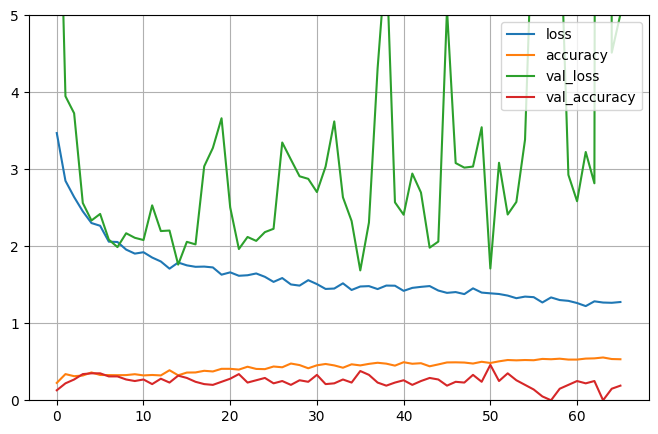

In [404]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

Even after making some changes, there's a lot of instability so I'm going to normalize the data again and see if anything improves.

In [406]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_cnn = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_cnn = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)
X_test_cnn = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [407]:
X_train_cnn = X_train.to_numpy()[..., np.newaxis]
X_test_cnn = X_test.to_numpy()[..., np.newaxis]
X_val_cnn = X_val.to_numpy()[..., np.newaxis]

In [408]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Conv2D(128, (3,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 54, 1, 512)        2560      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 27, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_203 (Ba  (None, 27, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 1, 256)        524544    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 12, 1, 256)       0         
 g2D)                                                            
                                                     

In [409]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [410]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 20ms/step - loss: 3.5684 - accuracy: 0.1786 - val_loss: 10.5715 - val_accuracy: 0.1000
Epoch 2/300
22/22 [==============================] - 0s 15ms/step - loss: 2.8950 - accuracy: 0.3543 - val_loss: 5.2528 - val_accuracy: 0.1600
Epoch 3/300
22/22 [==============================] - 0s 15ms/step - loss: 2.6434 - accuracy: 0.3614 - val_loss: 4.4531 - val_accuracy: 0.1600
Epoch 4/300
22/22 [==============================] - 0s 15ms/step - loss: 2.4578 - accuracy: 0.3786 - val_loss: 3.7386 - val_accuracy: 0.2500
Epoch 5/300
22/22 [==============================] - 0s 16ms/step - loss: 2.3299 - accuracy: 0.3843 - val_loss: 2.8340 - val_accuracy: 0.3400
Epoch 6/300
22/22 [==============================] - 0s 15ms/step - loss: 2.2615 - accuracy: 0.3629 - val_loss: 2.3694 - val_accuracy: 0.3700
Epoch 7/300
22/22 [==============================] - 0s 15ms/step - loss: 2.1761 - accuracy: 0.3743 - val_loss: 2.7397 - val_accuracy: 0.3100
Epoch

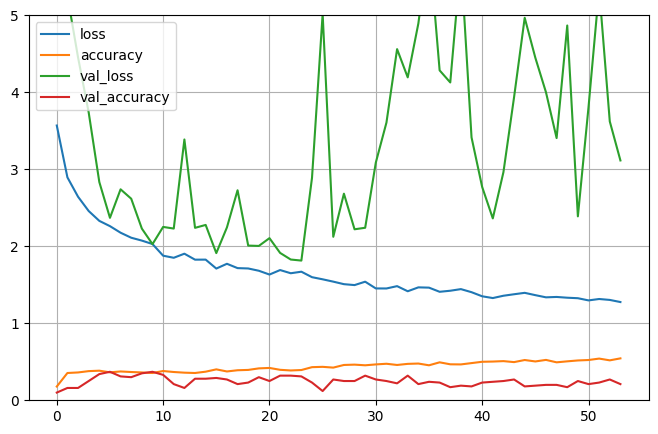

In [411]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

Just as chaotic as before, but hopefully I can fix that with some network tweaks.

In [412]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((4,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((4,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(128, (3,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 54, 1, 512)        2560      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 27, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_207 (Ba  (None, 27, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 dropout_146 (Dropout)       (None, 27, 1, 512)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 24, 1, 256)        524544    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 12, 1, 256)     

In [413]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [414]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 22ms/step - loss: 3.6827 - accuracy: 0.1614 - val_loss: 15.1139 - val_accuracy: 0.1100
Epoch 2/300
22/22 [==============================] - 0s 18ms/step - loss: 3.0688 - accuracy: 0.3200 - val_loss: 7.3227 - val_accuracy: 0.1800
Epoch 3/300
22/22 [==============================] - 0s 17ms/step - loss: 2.8016 - accuracy: 0.3371 - val_loss: 5.2025 - val_accuracy: 0.2100
Epoch 4/300
22/22 [==============================] - 0s 18ms/step - loss: 2.6556 - accuracy: 0.3486 - val_loss: 3.5510 - val_accuracy: 0.2800
Epoch 5/300
22/22 [==============================] - 0s 18ms/step - loss: 2.4924 - accuracy: 0.3457 - val_loss: 3.0115 - val_accuracy: 0.3000
Epoch 6/300
22/22 [==============================] - 0s 18ms/step - loss: 2.3666 - accuracy: 0.3514 - val_loss: 2.3335 - val_accuracy: 0.3800
Epoch 7/300
22/22 [==============================] - 0s 18ms/step - loss: 2.2494 - accuracy: 0.3800 - val_loss: 2.1357 - val_accuracy: 0.3400
Epoch

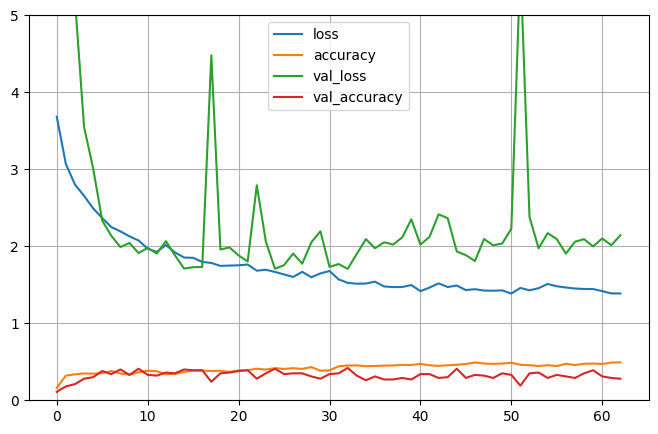

In [415]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

Some sharp spiking but there's less of it overall, hopefully a sign that we're going in the right direction.

In [435]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (4,1), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 54, 1, 512)        2560      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 27, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_239 (Ba  (None, 27, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 conv2d_64 (Conv2D)          (None, 24, 1, 256)        524544    
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 12, 1, 256)       0         
 g2D)                                                            
                                                     

In [436]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True),
              metrics=["accuracy"])

In [437]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 19ms/step - loss: 4.0074 - accuracy: 0.0829 - val_loss: 5.2546 - val_accuracy: 0.0200
Epoch 2/300
22/22 [==============================] - 0s 15ms/step - loss: 3.4566 - accuracy: 0.2229 - val_loss: 4.3749 - val_accuracy: 0.0500
Epoch 3/300
22/22 [==============================] - 0s 15ms/step - loss: 3.2079 - accuracy: 0.2857 - val_loss: 3.8474 - val_accuracy: 0.1200
Epoch 4/300
22/22 [==============================] - 0s 14ms/step - loss: 3.1269 - accuracy: 0.3386 - val_loss: 3.6974 - val_accuracy: 0.1900
Epoch 5/300
22/22 [==============================] - 0s 14ms/step - loss: 3.0182 - accuracy: 0.3514 - val_loss: 3.4998 - val_accuracy: 0.2800
Epoch 6/300
22/22 [==============================] - 0s 13ms/step - loss: 3.0050 - accuracy: 0.3614 - val_loss: 3.3762 - val_accuracy: 0.2700
Epoch 7/300
22/22 [==============================] - 0s 14ms/step - loss: 2.9059 - accuracy: 0.3700 - val_loss: 3.2351 - val_accuracy: 0.3600
Epoch 

22/22 [==============================] - 0s 15ms/step - loss: 0.9312 - accuracy: 0.6943 - val_loss: 1.5637 - val_accuracy: 0.4500
Epoch 116/300
22/22 [==============================] - 0s 14ms/step - loss: 1.0187 - accuracy: 0.6514 - val_loss: 1.9176 - val_accuracy: 0.4400
Epoch 117/300
22/22 [==============================] - 0s 14ms/step - loss: 0.9520 - accuracy: 0.7114 - val_loss: 2.4654 - val_accuracy: 0.4500
Epoch 118/300
22/22 [==============================] - 0s 14ms/step - loss: 1.0127 - accuracy: 0.6657 - val_loss: 1.4319 - val_accuracy: 0.5300
Epoch 119/300
22/22 [==============================] - 0s 14ms/step - loss: 1.0032 - accuracy: 0.6571 - val_loss: 1.7863 - val_accuracy: 0.4300
Epoch 120/300
22/22 [==============================] - 0s 14ms/step - loss: 0.9609 - accuracy: 0.6757 - val_loss: 1.8466 - val_accuracy: 0.4500
Epoch 121/300
22/22 [==============================] - 0s 14ms/step - loss: 0.9466 - accuracy: 0.6829 - val_loss: 1.8234 - val_accuracy: 0.4400
Epoch 

Epoch 172/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6830 - accuracy: 0.7629 - val_loss: 1.5516 - val_accuracy: 0.5300
Epoch 173/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6149 - accuracy: 0.8029 - val_loss: 1.6062 - val_accuracy: 0.4900
Epoch 174/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6626 - accuracy: 0.7771 - val_loss: 1.8503 - val_accuracy: 0.4600
Epoch 175/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6901 - accuracy: 0.7643 - val_loss: 1.5880 - val_accuracy: 0.4700
Epoch 176/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6678 - accuracy: 0.7800 - val_loss: 1.4502 - val_accuracy: 0.5000
Epoch 177/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6512 - accuracy: 0.7857 - val_loss: 1.6682 - val_accuracy: 0.4900
Epoch 178/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6660 - accuracy: 0.7914 - val_loss: 1.8684 - val_accuracy:

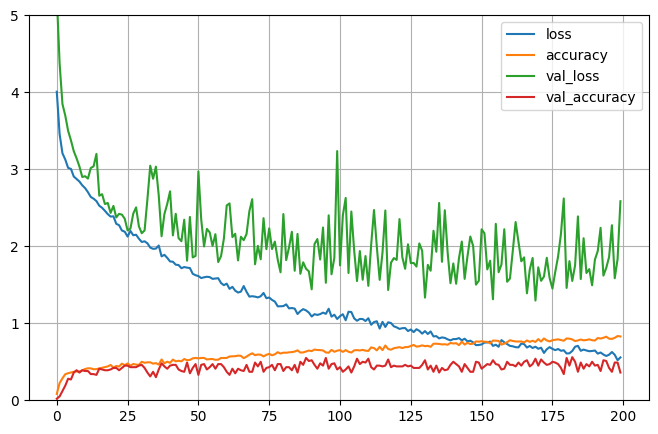

In [438]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

I think that might be progress. The validation loss and the validation accuracy are bad, but we might have some more success with lower learning rates and some dropout taking place.

In [445]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(128, (4,1), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 54, 1, 512)        2560      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 27, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_248 (Ba  (None, 27, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 dropout_170 (Dropout)       (None, 27, 1, 512)        0         
                                                                 
 conv2d_73 (Conv2D)          (None, 24, 1, 256)        524544    
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 12, 1, 256)     

In [446]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True),
              metrics=["accuracy"])

In [447]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 23ms/step - loss: 4.1126 - accuracy: 0.0643 - val_loss: 3.6008 - val_accuracy: 0.1400
Epoch 2/300
22/22 [==============================] - 0s 18ms/step - loss: 3.6385 - accuracy: 0.1386 - val_loss: 3.4680 - val_accuracy: 0.2000
Epoch 3/300
22/22 [==============================] - 0s 18ms/step - loss: 3.3933 - accuracy: 0.2414 - val_loss: 3.4024 - val_accuracy: 0.2000
Epoch 4/300
22/22 [==============================] - 0s 19ms/step - loss: 3.2964 - accuracy: 0.2814 - val_loss: 3.2720 - val_accuracy: 0.2800
Epoch 5/300
22/22 [==============================] - 0s 18ms/step - loss: 3.2389 - accuracy: 0.2814 - val_loss: 3.1485 - val_accuracy: 0.2900
Epoch 6/300
22/22 [==============================] - 0s 18ms/step - loss: 3.1479 - accuracy: 0.3186 - val_loss: 3.1087 - val_accuracy: 0.2900
Epoch 7/300
22/22 [==============================] - 0s 18ms/step - loss: 3.0437 - accuracy: 0.3314 - val_loss: 3.0245 - val_accuracy: 0.2900
Epoch 

22/22 [==============================] - 0s 20ms/step - loss: 1.4117 - accuracy: 0.5257 - val_loss: 1.5055 - val_accuracy: 0.4800
Epoch 116/300
22/22 [==============================] - 0s 19ms/step - loss: 1.4288 - accuracy: 0.4929 - val_loss: 1.5240 - val_accuracy: 0.5000
Epoch 117/300
22/22 [==============================] - 0s 19ms/step - loss: 1.4177 - accuracy: 0.5214 - val_loss: 1.4939 - val_accuracy: 0.4900
Epoch 118/300
22/22 [==============================] - 0s 19ms/step - loss: 1.4663 - accuracy: 0.4957 - val_loss: 1.5410 - val_accuracy: 0.4300
Epoch 119/300
22/22 [==============================] - 0s 19ms/step - loss: 1.4194 - accuracy: 0.5314 - val_loss: 1.5435 - val_accuracy: 0.4600
Epoch 120/300
22/22 [==============================] - 0s 20ms/step - loss: 1.4103 - accuracy: 0.5186 - val_loss: 1.6287 - val_accuracy: 0.4500
Epoch 121/300
22/22 [==============================] - 0s 19ms/step - loss: 1.5274 - accuracy: 0.4871 - val_loss: 1.6664 - val_accuracy: 0.4200
Epoch 

Epoch 172/300
22/22 [==============================] - 0s 19ms/step - loss: 1.2378 - accuracy: 0.5700 - val_loss: 1.4409 - val_accuracy: 0.5100
Epoch 173/300
22/22 [==============================] - 0s 19ms/step - loss: 1.2609 - accuracy: 0.5400 - val_loss: 1.5351 - val_accuracy: 0.4700


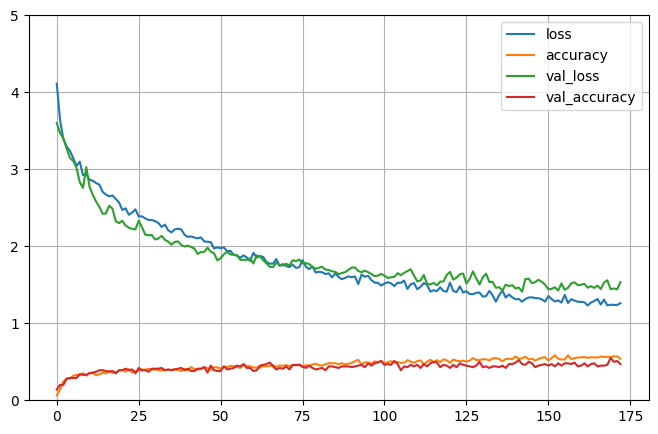

In [448]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

It's smoother, but I'm not really getting the kind of success I'm looking for. Let me try something new:

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666, random_state=42, stratify=y_test)

X_train_cnn = normalize(X_train, norm='l2')
X_test_cnn = normalize(X_test, norm='l2')
X_val_cnn = normalize(X_val, norm='l2')

In [450]:
X_train_cnn = X_train.to_numpy()[..., np.newaxis]
X_test_cnn = X_test.to_numpy()[..., np.newaxis]
X_val_cnn = X_val.to_numpy()[..., np.newaxis]

In [451]:
print(X_train_cnn)

[[[ 4.28634793e-01]
  [ 8.92211348e-02]
  [ 1.07873254e-01]
  ...
  [ 6.70253983e+01]
  [ 4.96619523e-01]
  [ 1.10006645e+02]]

 [[ 3.97854686e-01]
  [ 8.22843388e-02]
  [ 1.13300778e-01]
  ...
  [ 2.91719666e+01]
  [-4.93989897e+00]
  [ 2.98046761e+01]]

 [[ 2.66826898e-01]
  [ 8.42269138e-02]
  [ 1.65461190e-02]
  ...
  [ 7.57382278e+01]
  [ 1.81680822e+00]
  [ 1.02780624e+02]]

 ...

 [[ 4.27234828e-01]
  [ 8.70649293e-02]
  [ 1.71670407e-01]
  ...
  [ 8.79700089e+01]
  [-7.36063898e-01]
  [ 7.79792480e+01]]

 [[ 3.55708987e-01]
  [ 8.95760730e-02]
  [ 1.75499350e-01]
  ...
  [ 4.10513954e+01]
  [-2.28690386e+00]
  [ 4.62644081e+01]]

 [[ 3.58244777e-01]
  [ 9.43883583e-02]
  [ 7.87653998e-02]
  ...
  [ 8.25474930e+01]
  [-5.62400639e-01]
  [ 8.73007202e+01]]]


In [452]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (4,1), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 54, 1, 512)        2560      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 27, 1, 512)       0         
 g2D)                                                            
                                                                 
 batch_normalization_251 (Ba  (None, 27, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 conv2d_76 (Conv2D)          (None, 24, 1, 256)        524544    
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 12, 1, 256)       0         
 g2D)                                                            
                                                     

In [453]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True),
              metrics=["accuracy"])

In [454]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 21ms/step - loss: 3.7812 - accuracy: 0.1100 - val_loss: 4.7551 - val_accuracy: 0.0500
Epoch 2/300
22/22 [==============================] - 0s 16ms/step - loss: 3.3370 - accuracy: 0.2300 - val_loss: 3.6529 - val_accuracy: 0.1800
Epoch 3/300
22/22 [==============================] - 0s 16ms/step - loss: 3.1953 - accuracy: 0.2714 - val_loss: 3.4787 - val_accuracy: 0.2200
Epoch 4/300
22/22 [==============================] - 0s 17ms/step - loss: 3.1124 - accuracy: 0.3043 - val_loss: 3.3462 - val_accuracy: 0.2200
Epoch 5/300
22/22 [==============================] - 0s 16ms/step - loss: 3.0189 - accuracy: 0.3314 - val_loss: 3.3861 - val_accuracy: 0.2000
Epoch 6/300
22/22 [==============================] - 0s 17ms/step - loss: 2.9551 - accuracy: 0.3414 - val_loss: 3.2044 - val_accuracy: 0.3200
Epoch 7/300
22/22 [==============================] - 0s 16ms/step - loss: 2.8805 - accuracy: 0.3686 - val_loss: 3.1599 - val_accuracy: 0.2900
Epoch 

22/22 [==============================] - 0s 16ms/step - loss: 1.0836 - accuracy: 0.6343 - val_loss: 2.1755 - val_accuracy: 0.4300
Epoch 116/300
22/22 [==============================] - 0s 14ms/step - loss: 1.0871 - accuracy: 0.6371 - val_loss: 2.1007 - val_accuracy: 0.3900
Epoch 117/300
22/22 [==============================] - 0s 16ms/step - loss: 1.0455 - accuracy: 0.6471 - val_loss: 2.9307 - val_accuracy: 0.3700
Epoch 118/300
22/22 [==============================] - 0s 16ms/step - loss: 1.0230 - accuracy: 0.6700 - val_loss: 2.3296 - val_accuracy: 0.3800
Epoch 119/300
22/22 [==============================] - 0s 16ms/step - loss: 1.1114 - accuracy: 0.6329 - val_loss: 2.2876 - val_accuracy: 0.4100
Epoch 120/300
22/22 [==============================] - 0s 16ms/step - loss: 1.0489 - accuracy: 0.6286 - val_loss: 2.2510 - val_accuracy: 0.4300
Epoch 121/300
22/22 [==============================] - 0s 18ms/step - loss: 1.0850 - accuracy: 0.6271 - val_loss: 1.6880 - val_accuracy: 0.4500
Epoch 

Epoch 172/300
22/22 [==============================] - 0s 15ms/step - loss: 0.8426 - accuracy: 0.7143 - val_loss: 1.6481 - val_accuracy: 0.4200
Epoch 173/300
22/22 [==============================] - 0s 15ms/step - loss: 0.8576 - accuracy: 0.7157 - val_loss: 1.9166 - val_accuracy: 0.4000
Epoch 174/300
22/22 [==============================] - 0s 14ms/step - loss: 0.8304 - accuracy: 0.7214 - val_loss: 2.0780 - val_accuracy: 0.4600
Epoch 175/300
22/22 [==============================] - 0s 15ms/step - loss: 0.8476 - accuracy: 0.7071 - val_loss: 2.0666 - val_accuracy: 0.4000
Epoch 176/300
22/22 [==============================] - 0s 15ms/step - loss: 0.8489 - accuracy: 0.7300 - val_loss: 1.5271 - val_accuracy: 0.5000
Epoch 177/300
22/22 [==============================] - 0s 15ms/step - loss: 0.8156 - accuracy: 0.7143 - val_loss: 1.9922 - val_accuracy: 0.4100
Epoch 178/300
22/22 [==============================] - 0s 15ms/step - loss: 0.7981 - accuracy: 0.7443 - val_loss: 1.8781 - val_accuracy:

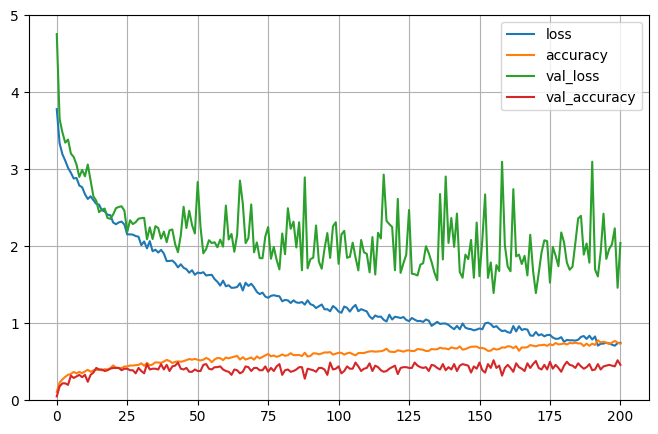

In [455]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

In [463]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.AveragePooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (4,1), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 54, 1, 512)        2560      
                                                                 
 average_pooling2d (AverageP  (None, 27, 1, 512)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_260 (Ba  (None, 27, 1, 512)       2048      
 tchNormalization)                                               
                                                                 
 conv2d_86 (Conv2D)          (None, 24, 1, 256)        524544    
                                                                 
 average_pooling2d_1 (Averag  (None, 12, 1, 256)       0         
 ePooling2D)                                                     
                                                     

In [464]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True),
              metrics=["accuracy"])

In [465]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, batch_size=32, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 1s 19ms/step - loss: 3.8867 - accuracy: 0.1057 - val_loss: 4.4240 - val_accuracy: 0.0100
Epoch 2/300
22/22 [==============================] - 0s 14ms/step - loss: 3.3618 - accuracy: 0.2686 - val_loss: 4.0358 - val_accuracy: 0.0400
Epoch 3/300
22/22 [==============================] - 0s 15ms/step - loss: 3.1711 - accuracy: 0.3329 - val_loss: 3.9092 - val_accuracy: 0.0700
Epoch 4/300
22/22 [==============================] - 0s 16ms/step - loss: 3.0939 - accuracy: 0.3600 - val_loss: 3.8731 - val_accuracy: 0.1800
Epoch 5/300
22/22 [==============================] - 0s 14ms/step - loss: 2.9843 - accuracy: 0.3414 - val_loss: 3.7629 - val_accuracy: 0.1700
Epoch 6/300
22/22 [==============================] - 0s 15ms/step - loss: 2.9734 - accuracy: 0.3543 - val_loss: 3.5616 - val_accuracy: 0.2400
Epoch 7/300
22/22 [==============================] - 0s 14ms/step - loss: 2.9304 - accuracy: 0.3771 - val_loss: 3.4349 - val_accuracy: 0.3600
Epoch 

22/22 [==============================] - 0s 13ms/step - loss: 1.2868 - accuracy: 0.5700 - val_loss: 3.5950 - val_accuracy: 0.3100
Epoch 116/300
22/22 [==============================] - 0s 16ms/step - loss: 1.2636 - accuracy: 0.5629 - val_loss: 1.8793 - val_accuracy: 0.4100
Epoch 117/300
22/22 [==============================] - 0s 14ms/step - loss: 1.2561 - accuracy: 0.5914 - val_loss: 1.6107 - val_accuracy: 0.4600
Epoch 118/300
22/22 [==============================] - 0s 14ms/step - loss: 1.2683 - accuracy: 0.5700 - val_loss: 1.6496 - val_accuracy: 0.4000
Epoch 119/300
22/22 [==============================] - 0s 15ms/step - loss: 1.2414 - accuracy: 0.5671 - val_loss: 1.7810 - val_accuracy: 0.3800
Epoch 120/300
22/22 [==============================] - 0s 14ms/step - loss: 1.2287 - accuracy: 0.5814 - val_loss: 2.1087 - val_accuracy: 0.3800
Epoch 121/300
22/22 [==============================] - 0s 13ms/step - loss: 1.2641 - accuracy: 0.5571 - val_loss: 1.8253 - val_accuracy: 0.3800
Epoch 

Epoch 172/300
22/22 [==============================] - 0s 14ms/step - loss: 1.0344 - accuracy: 0.6357 - val_loss: 1.8081 - val_accuracy: 0.4700
Epoch 173/300
22/22 [==============================] - 0s 14ms/step - loss: 1.0251 - accuracy: 0.6429 - val_loss: 1.4916 - val_accuracy: 0.4500
Epoch 174/300
22/22 [==============================] - 0s 12ms/step - loss: 1.0867 - accuracy: 0.6157 - val_loss: 1.4541 - val_accuracy: 0.4400
Epoch 175/300
22/22 [==============================] - 0s 13ms/step - loss: 1.1115 - accuracy: 0.5800 - val_loss: 1.7259 - val_accuracy: 0.4300
Epoch 176/300
22/22 [==============================] - 0s 14ms/step - loss: 1.0893 - accuracy: 0.6229 - val_loss: 1.5412 - val_accuracy: 0.4500
Epoch 177/300
22/22 [==============================] - 0s 13ms/step - loss: 1.0745 - accuracy: 0.6414 - val_loss: 1.5000 - val_accuracy: 0.5000
Epoch 178/300
22/22 [==============================] - 0s 13ms/step - loss: 1.0353 - accuracy: 0.6429 - val_loss: 1.5235 - val_accuracy:

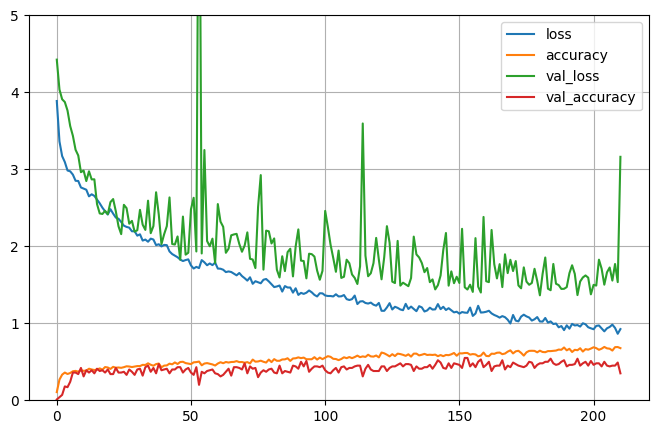

In [466]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

Even with changing the normalization approach, I'm not finding any success unfortunately. I'm not sure how to really increase the val_accuracy, since even if my accuracy is increasing the validation accuracy isn't keeping pace, which is a good indicator of overfitting. I'm going to move on to RNNs and see if I can get more success there.

<a id='RNN_1'></a>
### Model 3: RNN

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666, random_state=42, stratify=y_test)

print(len(X_train))
print(len(X_test))
print(len(X_val))

700
200
100


In [10]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(64,input_shape=(57,1),return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 57, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 54,730
Trainable params: 54,730
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True),
              metrics=["accuracy"])

In [11]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 3s 39ms/step - loss: 2.3127 - accuracy: 0.1014 - val_loss: 2.2974 - val_accuracy: 0.1700
Epoch 2/300
22/22 [==============================] - 0s 17ms/step - loss: 2.2925 - accuracy: 0.1414 - val_loss: 2.2837 - val_accuracy: 0.1500
Epoch 3/300
22/22 [==============================] - 0s 17ms/step - loss: 2.2799 - accuracy: 0.1471 - val_loss: 2.2675 - val_accuracy: 0.1900
Epoch 4/300
22/22 [==============================] - 0s 18ms/step - loss: 2.2638 - accuracy: 0.1614 - val_loss: 2.2486 - val_accuracy: 0.1900
Epoch 5/300
22/22 [==============================] - 0s 18ms/step - loss: 2.2410 - accuracy: 0.1814 - val_loss: 2.2238 - val_accuracy: 0.1900
Epoch 6/300
22/22 [==============================] - 0s 17ms/step - loss: 2.2180 - accuracy: 0.2029 - val_loss: 2.1954 - val_accuracy: 0.2200
Epoch 7/300
22/22 [==============================] - 0s 17ms/step - loss: 2.1947 - accuracy: 0.1986 - val_loss: 2.1639 - val_accuracy: 0.2600
Epoch 

22/22 [==============================] - 0s 17ms/step - loss: 1.1519 - accuracy: 0.5914 - val_loss: 1.3777 - val_accuracy: 0.4700
Epoch 116/300
22/22 [==============================] - 0s 17ms/step - loss: 1.1518 - accuracy: 0.5871 - val_loss: 1.4010 - val_accuracy: 0.4800
Epoch 117/300
22/22 [==============================] - 0s 17ms/step - loss: 1.1383 - accuracy: 0.5800 - val_loss: 1.4357 - val_accuracy: 0.4600
Epoch 118/300
22/22 [==============================] - 0s 17ms/step - loss: 1.1633 - accuracy: 0.5786 - val_loss: 1.3707 - val_accuracy: 0.4800
Epoch 119/300
22/22 [==============================] - 0s 17ms/step - loss: 1.1507 - accuracy: 0.5657 - val_loss: 1.3925 - val_accuracy: 0.5100
Epoch 120/300
22/22 [==============================] - 0s 17ms/step - loss: 1.1549 - accuracy: 0.5800 - val_loss: 1.3861 - val_accuracy: 0.4800
Epoch 121/300
22/22 [==============================] - 0s 17ms/step - loss: 1.1235 - accuracy: 0.5929 - val_loss: 1.3444 - val_accuracy: 0.5000
Epoch 

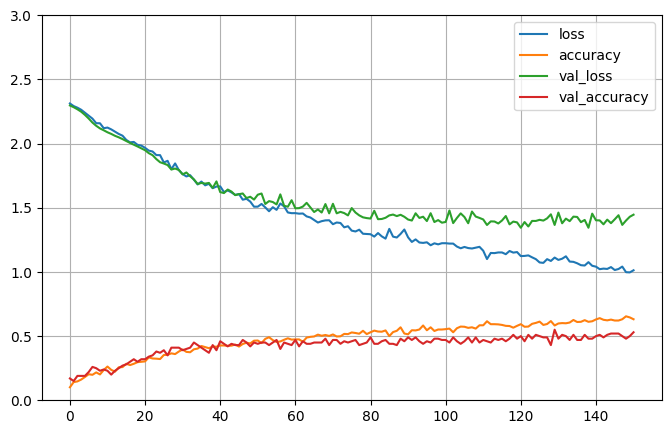

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3) # set the vertical range to [0-1]
plt.show()

For a first pass with almost no changes done, this is a great result! The validation loss is diverging, but we might be abme to make some better progress with some tweaks.

In [17]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(57,1),return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 57, 128)           66560     
                                                                 
 batch_normalization_2 (Batc  (None, 57, 128)          512       
 hNormalization)                                                 
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),
              metrics=["accuracy"])

In [19]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 3s 48ms/step - loss: 2.1991 - accuracy: 0.2057 - val_loss: 2.2696 - val_accuracy: 0.2100
Epoch 2/300
22/22 [==============================] - 1s 26ms/step - loss: 2.0158 - accuracy: 0.2629 - val_loss: 2.2451 - val_accuracy: 0.1600
Epoch 3/300
22/22 [==============================] - 1s 26ms/step - loss: 1.9119 - accuracy: 0.3214 - val_loss: 2.2083 - val_accuracy: 0.1600
Epoch 4/300
22/22 [==============================] - 1s 26ms/step - loss: 1.8332 - accuracy: 0.3643 - val_loss: 2.1425 - val_accuracy: 0.3200
Epoch 5/300
22/22 [==============================] - 1s 26ms/step - loss: 1.7285 - accuracy: 0.3814 - val_loss: 2.0716 - val_accuracy: 0.3000
Epoch 6/300
22/22 [==============================] - 1s 26ms/step - loss: 1.7031 - accuracy: 0.3829 - val_loss: 2.0047 - val_accuracy: 0.3600
Epoch 7/300
22/22 [==============================] - 1s 27ms/step - loss: 1.5802 - accuracy: 0.4329 - val_loss: 1.8979 - val_accuracy: 0.3600
Epoch 

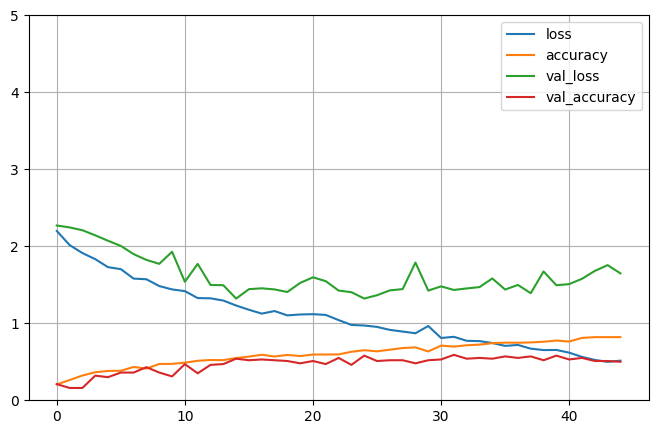

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

Adding Batch Normalization and increasing the learning rate is offering some better accuracy results, but we're seeing even more deviation between the validation accuracy and the accuracy. I think we should once again normalize the data to better constrain the data.

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [22]:
print(X_train[0:20])

     chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
823          0.428635         0.089221  0.107873  0.002750   
241          0.397855         0.082284  0.113301  0.000587   
181          0.266827         0.084227  0.016546  0.000050   
103          0.234229         0.083451  0.029442  0.000357   
456          0.491658         0.086806  0.166640  0.001742   
997          0.432142         0.075268  0.081651  0.000322   
313          0.421225         0.081892  0.170853  0.002371   
371          0.435500         0.082165  0.098152  0.001563   
998          0.362485         0.091506  0.083860  0.001211   
746          0.415095         0.090249  0.203482  0.005559   
553          0.311716         0.089816  0.130096  0.001595   
749          0.322675         0.089988  0.147519  0.003765   
432          0.475437         0.088209  0.134545  0.005214   
615          0.485148         0.067070  0.110964  0.000182   
558          0.322403         0.086367  0.080562  0.001165   
872     

In [27]:
X_train = min_max_scaler.fit_transform(X_train)

In [28]:
X_test = min_max_scaler.fit_transform(X_test)

In [29]:
X_val = min_max_scaler.fit_transform(X_val)

In [30]:
print(X_train[0:20])

[[0.55290089 0.75040857 0.31363689 ... 0.13662578 0.57865952 0.1909323 ]
 [0.48660311 0.63386703 0.33045045 ... 0.03641722 0.42464728 0.02709585]
 [0.20438017 0.66650323 0.03072067 ... 0.15969106 0.61605942 0.176171  ]
 ...
 [0.3671619  0.7977052  0.30505917 ... 0.15329041 0.4349564  0.0525338 ]
 [0.72793624 0.54767841 0.41009867 ... 0.09098649 0.69647797 0.01603018]
 [0.39056241 0.71808617 0.36446347 ... 0.11842658 0.64858125 0.14329625]]


In [31]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(57,1),return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 57, 128)           66560     
                                                                 
 batch_normalization_4 (Batc  (None, 57, 128)          512       
 hNormalization)                                                 
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),
              metrics=["accuracy"])

In [33]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 3s 46ms/step - loss: 2.3153 - accuracy: 0.1929 - val_loss: 2.2945 - val_accuracy: 0.1400
Epoch 2/300
22/22 [==============================] - 1s 25ms/step - loss: 2.0688 - accuracy: 0.2286 - val_loss: 2.2830 - val_accuracy: 0.1700
Epoch 3/300
22/22 [==============================] - 1s 25ms/step - loss: 1.8914 - accuracy: 0.2900 - val_loss: 2.2769 - val_accuracy: 0.1000
Epoch 4/300
22/22 [==============================] - 1s 25ms/step - loss: 1.8340 - accuracy: 0.3257 - val_loss: 2.3000 - val_accuracy: 0.1000
Epoch 5/300
22/22 [==============================] - 1s 26ms/step - loss: 1.8272 - accuracy: 0.3100 - val_loss: 2.2759 - val_accuracy: 0.1000
Epoch 6/300
22/22 [==============================] - 1s 25ms/step - loss: 1.7068 - accuracy: 0.3586 - val_loss: 2.2632 - val_accuracy: 0.1000
Epoch 7/300
22/22 [==============================] - 1s 25ms/step - loss: 1.6714 - accuracy: 0.3786 - val_loss: 2.3119 - val_accuracy: 0.1000
Epoch 

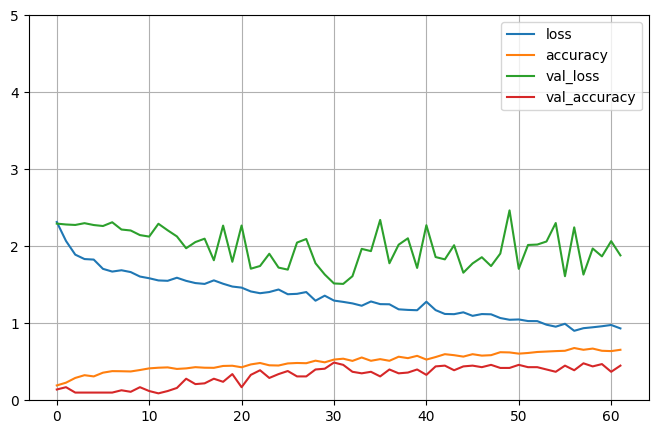

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

I think the normalization actually made things worse. I tried a different type of normalization than the other two models, but I don't think this is the best layout. I think it would be better to go back to unnormalized data, or at least pick a different normalization method.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666, random_state=42, stratify=y_test)

In [36]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(57,1),return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 57, 128)           66560     
                                                                 
 batch_normalization_6 (Batc  (None, 57, 128)          512       
 hNormalization)                                                 
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),
              metrics=["accuracy"])

In [38]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 4s 75ms/step - loss: 2.2258 - accuracy: 0.2114 - val_loss: 2.2597 - val_accuracy: 0.1500
Epoch 2/300
22/22 [==============================] - 1s 54ms/step - loss: 1.9375 - accuracy: 0.3071 - val_loss: 2.2433 - val_accuracy: 0.1600
Epoch 3/300
22/22 [==============================] - 1s 52ms/step - loss: 1.7766 - accuracy: 0.3771 - val_loss: 2.2476 - val_accuracy: 0.1700
Epoch 4/300
22/22 [==============================] - 1s 53ms/step - loss: 1.7358 - accuracy: 0.3814 - val_loss: 2.1508 - val_accuracy: 0.2300
Epoch 5/300
22/22 [==============================] - 1s 53ms/step - loss: 1.6363 - accuracy: 0.3957 - val_loss: 2.1645 - val_accuracy: 0.2200
Epoch 6/300
22/22 [==============================] - 1s 54ms/step - loss: 1.5617 - accuracy: 0.4429 - val_loss: 2.0433 - val_accuracy: 0.3300
Epoch 7/300
22/22 [==============================] - 1s 53ms/step - loss: 1.4293 - accuracy: 0.4814 - val_loss: 1.9851 - val_accuracy: 0.2900
Epoch 

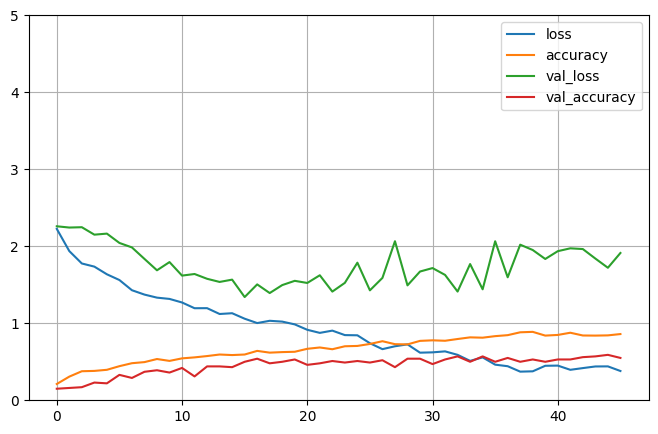

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

In [75]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, activation='tanh', input_shape=(57,1), return_sequences=True, recurrent_dropout=0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(128, activation='tanh', recurrent_dropout=0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 57, 128)           66560     
                                                                 
 batch_normalization_22 (Bat  (None, 57, 128)          512       
 chNormalization)                                                
                                                                 
 lstm_25 (LSTM)              (None, 128)               131584    
                                                                 
 batch_normalization_23 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)             

In [76]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005, amsgrad=True),
              metrics=["accuracy"])

In [77]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 4s 83ms/step - loss: 2.3353 - accuracy: 0.2343 - val_loss: 2.3752 - val_accuracy: 0.1900
Epoch 2/300
22/22 [==============================] - 2s 83ms/step - loss: 1.9905 - accuracy: 0.3086 - val_loss: 2.5642 - val_accuracy: 0.1400
Epoch 3/300
22/22 [==============================] - 2s 84ms/step - loss: 1.8538 - accuracy: 0.3386 - val_loss: 2.4685 - val_accuracy: 0.1800
Epoch 4/300
22/22 [==============================] - 2s 84ms/step - loss: 1.7318 - accuracy: 0.3443 - val_loss: 2.5446 - val_accuracy: 0.1600
Epoch 5/300
22/22 [==============================] - 2s 87ms/step - loss: 1.7689 - accuracy: 0.3829 - val_loss: 2.0770 - val_accuracy: 0.2100
Epoch 6/300
22/22 [==============================] - 2s 86ms/step - loss: 1.6139 - accuracy: 0.4257 - val_loss: 2.3872 - val_accuracy: 0.2000
Epoch 7/300
22/22 [==============================] - 2s 84ms/step - loss: 1.6398 - accuracy: 0.4200 - val_loss: 2.2991 - val_accuracy: 0.1700
Epoch 

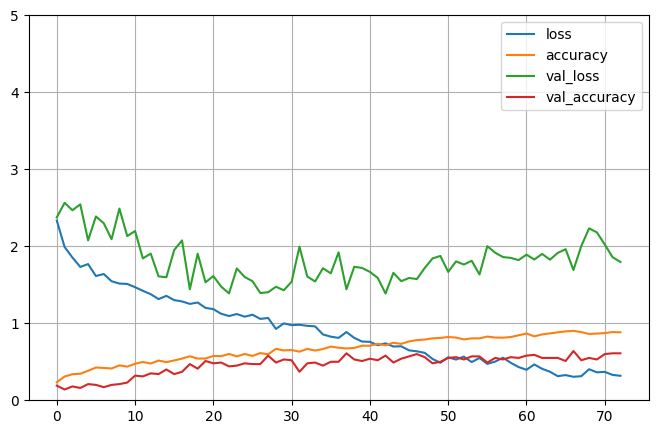

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

Things are still fluctuating pretty significantly, but I have gotten slightly better validation accuracy. I'm going to try a previous scaler which might give better results.

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [80]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, activation='tanh', input_shape=(57,1), return_sequences=True, recurrent_dropout=0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(128, activation='tanh', recurrent_dropout=0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 57, 128)           66560     
                                                                 
 batch_normalization_24 (Bat  (None, 57, 128)          512       
 chNormalization)                                                
                                                                 
 lstm_27 (LSTM)              (None, 128)               131584    
                                                                 
 batch_normalization_25 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dropout_16 (Dropout)        (None, 128)             

In [81]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005, amsgrad=True),
              metrics=["accuracy"])

In [82]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
22/22 [==============================] - 4s 93ms/step - loss: 2.6084 - accuracy: 0.1629 - val_loss: 2.3017 - val_accuracy: 0.1700
Epoch 2/300
22/22 [==============================] - 2s 84ms/step - loss: 2.1454 - accuracy: 0.2543 - val_loss: 2.2899 - val_accuracy: 0.1200
Epoch 3/300
22/22 [==============================] - 2s 84ms/step - loss: 2.1635 - accuracy: 0.2514 - val_loss: 2.5662 - val_accuracy: 0.1600
Epoch 4/300
22/22 [==============================] - 2s 88ms/step - loss: 2.0498 - accuracy: 0.2843 - val_loss: 2.4017 - val_accuracy: 0.1300
Epoch 5/300
22/22 [==============================] - 2s 88ms/step - loss: 2.0180 - accuracy: 0.2700 - val_loss: 2.3813 - val_accuracy: 0.1600
Epoch 6/300
22/22 [==============================] - 2s 89ms/step - loss: 1.8470 - accuracy: 0.3500 - val_loss: 2.2207 - val_accuracy: 0.1400
Epoch 7/300
22/22 [==============================] - 2s 89ms/step - loss: 1.6610 - accuracy: 0.3771 - val_loss: 2.6038 - val_accuracy: 0.2000
Epoch 

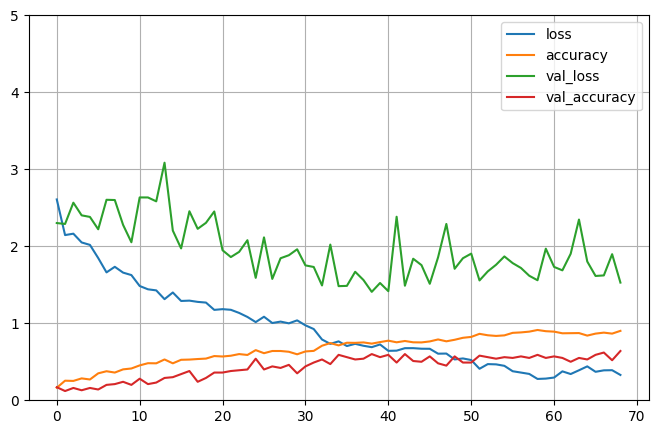

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

In [84]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 31ms/step - loss: 1.4354 - accuracy: 0.6000


It's an improvement, but only slightly so. I'm going to make a few more changes and tune a few more hyperparameters and see what we can squeeze out of this.

In [105]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, activation='tanh', input_shape=(57,1), return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.LSTM(64, activation='tanh', dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(64,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 57, 128)           66560     
                                                                 
 lstm_41 (LSTM)              (None, 64)                49408     
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 120,778
Trainable params: 120,778
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1.5e-4, amsgrad=True),
              metrics=["accuracy"])

In [107]:
history = model.fit(x=X_train, y=y_train, epochs=200, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/200
44/44 [==============================] - 7s 94ms/step - loss: 2.2756 - accuracy: 0.1529 - val_loss: 2.2364 - val_accuracy: 0.2300
Epoch 2/200
44/44 [==============================] - 4s 88ms/step - loss: 2.1623 - accuracy: 0.2143 - val_loss: 2.0809 - val_accuracy: 0.2600
Epoch 3/200
44/44 [==============================] - 4s 90ms/step - loss: 2.0077 - accuracy: 0.2314 - val_loss: 1.9739 - val_accuracy: 0.2300
Epoch 4/200
44/44 [==============================] - 4s 88ms/step - loss: 1.9400 - accuracy: 0.2443 - val_loss: 1.8663 - val_accuracy: 0.2600
Epoch 5/200
44/44 [==============================] - 4s 89ms/step - loss: 1.8888 - accuracy: 0.2886 - val_loss: 1.8116 - val_accuracy: 0.2700
Epoch 6/200
44/44 [==============================] - 4s 88ms/step - loss: 1.8708 - accuracy: 0.2700 - val_loss: 1.7908 - val_accuracy: 0.2700
Epoch 7/200
44/44 [==============================] - 4s 88ms/step - loss: 1.8315 - accuracy: 0.3086 - val_loss: 1.7453 - val_accuracy: 0.2700
Epoch 

44/44 [==============================] - 4s 88ms/step - loss: 1.2666 - accuracy: 0.5357 - val_loss: 1.3705 - val_accuracy: 0.5000
Epoch 116/200
44/44 [==============================] - 4s 88ms/step - loss: 1.2547 - accuracy: 0.5471 - val_loss: 1.3939 - val_accuracy: 0.5000
Epoch 117/200
44/44 [==============================] - 4s 88ms/step - loss: 1.2582 - accuracy: 0.5514 - val_loss: 1.3777 - val_accuracy: 0.5000
Epoch 118/200
44/44 [==============================] - 4s 88ms/step - loss: 1.2559 - accuracy: 0.5586 - val_loss: 1.4164 - val_accuracy: 0.5500
Epoch 119/200
44/44 [==============================] - 4s 88ms/step - loss: 1.2421 - accuracy: 0.5514 - val_loss: 1.3294 - val_accuracy: 0.5200
Epoch 120/200
44/44 [==============================] - 4s 88ms/step - loss: 1.2057 - accuracy: 0.5629 - val_loss: 1.3889 - val_accuracy: 0.5100
Epoch 121/200
44/44 [==============================] - 4s 89ms/step - loss: 1.2161 - accuracy: 0.5657 - val_loss: 1.4028 - val_accuracy: 0.4600
Epoch 

Epoch 172/200
44/44 [==============================] - 4s 88ms/step - loss: 1.0535 - accuracy: 0.6143 - val_loss: 1.3454 - val_accuracy: 0.5700
Epoch 173/200
44/44 [==============================] - 4s 88ms/step - loss: 1.0656 - accuracy: 0.6214 - val_loss: 1.3724 - val_accuracy: 0.5100
Epoch 174/200
44/44 [==============================] - 4s 88ms/step - loss: 1.0902 - accuracy: 0.6014 - val_loss: 1.3118 - val_accuracy: 0.5500
Epoch 175/200
44/44 [==============================] - 4s 89ms/step - loss: 1.1240 - accuracy: 0.5843 - val_loss: 1.2888 - val_accuracy: 0.5400
Epoch 176/200
44/44 [==============================] - 4s 89ms/step - loss: 1.0475 - accuracy: 0.6186 - val_loss: 1.4020 - val_accuracy: 0.5100
Epoch 177/200
44/44 [==============================] - 4s 88ms/step - loss: 1.0417 - accuracy: 0.6171 - val_loss: 1.2722 - val_accuracy: 0.5600
Epoch 178/200
44/44 [==============================] - 4s 89ms/step - loss: 1.0508 - accuracy: 0.6429 - val_loss: 1.3179 - val_accuracy:

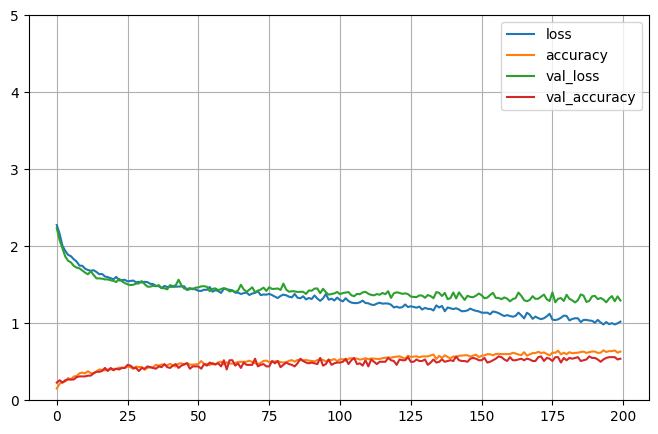

In [108]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) # set the vertical range to [0-1]
plt.show()

It's quite the long run and we're still seeing validation loss flatline and validation accuracy start to diverge. This is still indicating some level of overfitting. I'll make a few more changes and if I don't have any success, I'm going to try a different approach.

In [109]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, activation='tanh', input_shape=(57,1), return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.LSTM(64, activation='tanh', dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(64,activation='selu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 57, 128)           66560     
                                                                 
 lstm_43 (LSTM)              (None, 64)                49408     
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 10)                650       
                                                                 
Total params: 120,778
Trainable params: 120,778
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1.0e-3, amsgrad=True),
              metrics=["accuracy"])

In [111]:
history = model.fit(x=X_train, y=y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/200
22/22 [==============================] - 4s 86ms/step - loss: 2.1353 - accuracy: 0.2200 - val_loss: 1.9921 - val_accuracy: 0.2400
Epoch 2/200
22/22 [==============================] - 2s 74ms/step - loss: 1.9355 - accuracy: 0.2643 - val_loss: 1.8565 - val_accuracy: 0.2900
Epoch 3/200
22/22 [==============================] - 2s 73ms/step - loss: 1.8752 - accuracy: 0.2871 - val_loss: 1.7292 - val_accuracy: 0.2800
Epoch 4/200
22/22 [==============================] - 2s 74ms/step - loss: 1.7571 - accuracy: 0.3414 - val_loss: 1.7269 - val_accuracy: 0.3700
Epoch 5/200
22/22 [==============================] - 2s 73ms/step - loss: 1.7441 - accuracy: 0.3471 - val_loss: 1.7084 - val_accuracy: 0.3500
Epoch 6/200
22/22 [==============================] - 2s 72ms/step - loss: 1.6732 - accuracy: 0.3757 - val_loss: 1.6901 - val_accuracy: 0.3600
Epoch 7/200
22/22 [==============================] - 2s 72ms/step - loss: 1.6577 - accuracy: 0.3843 - val_loss: 1.6490 - val_accuracy: 0.4100
Epoch 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666, random_state=42, stratify=y_test)

In [113]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, activation='tanh', input_shape=(57,1), return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.LSTM(64, activation='tanh', dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 57, 128)           66560     
                                                                 
 lstm_45 (LSTM)              (None, 64)                49408     
                                                                 
 dense_50 (Dense)            (None, 64)                4160      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 10)                650       
                                                                 
Total params: 120,778
Trainable params: 120,778
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1.0e-3, amsgrad=True),
              metrics=["accuracy"])

In [115]:
history = model.fit(x=X_train, y=y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/200
22/22 [==============================] - 4s 89ms/step - loss: 2.3021 - accuracy: 0.1257 - val_loss: 2.2351 - val_accuracy: 0.1700
Epoch 2/200
22/22 [==============================] - 2s 76ms/step - loss: 2.1678 - accuracy: 0.2114 - val_loss: 2.0993 - val_accuracy: 0.1900
Epoch 3/200
22/22 [==============================] - 2s 77ms/step - loss: 2.0688 - accuracy: 0.2414 - val_loss: 2.0465 - val_accuracy: 0.2400
Epoch 4/200
22/22 [==============================] - 2s 77ms/step - loss: 2.0122 - accuracy: 0.2743 - val_loss: 2.0626 - val_accuracy: 0.2200
Epoch 5/200
22/22 [==============================] - 2s 77ms/step - loss: 1.9753 - accuracy: 0.2886 - val_loss: 2.0001 - val_accuracy: 0.2600
Epoch 6/200
22/22 [==============================] - 2s 77ms/step - loss: 1.9545 - accuracy: 0.2757 - val_loss: 1.9213 - val_accuracy: 0.2500
Epoch 7/200
22/22 [==============================] - 2s 76ms/step - loss: 1.8452 - accuracy: 0.3271 - val_loss: 1.8784 - val_accuracy: 0.3300
Epoch 

<a id='part_2'></a>
## Part 2: Taking a different approach

The results of each model were somewhat unsatisfactory, so I'm going to try a different subsection of the dataset. I've been using the features extracted from all 30 seconds, but we also have the features extracted from a 3 second snippet of each song as well. It's possible the data is too generalized to properly extract the features, so I'm going to pick the best models of each type and test them against the 3 second feature set.

Jump points: [DNN](#DNN_2) [CNN](#CNN_2) [RNN](#RNN_2)

In [20]:
short_music_data = pd.read_csv('features_3_sec.csv', header=0)

short_music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [21]:
#We're going to encode the labels for future use. It may be useful, but I'll put it in a numpy array in case it isn't.
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(short_music_data['label'])

print(y)

[0 0 0 ... 9 9 9]


In [22]:
#Now to separate the rest and put it in a dataframe so we can make a train/test split on the data
#I'm removing these because I know they won't be used anywhere during training, and all three have pretty poor correlation as shown in the heatmap.

X = short_music_data.drop(columns=['label', 'filename', 'length'], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         9990 non-null   float64
 1   chroma_stft_var          9990 non-null   float64
 2   rms_mean                 9990 non-null   float64
 3   rms_var                  9990 non-null   float64
 4   spectral_centroid_mean   9990 non-null   float64
 5   spectral_centroid_var    9990 non-null   float64
 6   spectral_bandwidth_mean  9990 non-null   float64
 7   spectral_bandwidth_var   9990 non-null   float64
 8   rolloff_mean             9990 non-null   float64
 9   rolloff_var              9990 non-null   float64
 10  zero_crossing_rate_mean  9990 non-null   float64
 11  zero_crossing_rate_var   9990 non-null   float64
 12  harmony_mean             9990 non-null   float64
 13  harmony_var              9990 non-null   float64
 14  perceptr_mean           

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666666, random_state=42, stratify=y_test)

print(len(X_train))
print(len(X_test))
print(len(X_val))

6993
1998
999


Oh, this is very interesting. The amount of data here is significantly higher, likely due to getting each of the values from a subsection of the entire song 10 times instead of the entire song once. This should greatly increase the accuracy of the networks, just based on the data alone.

<a id='DNN_2'></a>
### Model 1: DNN Round 2

In [130]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(150, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 57)                0         
                                                                 
 dense_52 (Dense)            (None, 500)               29000     
                                                                 
 batch_normalization_26 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 500)               0         
                                                                 
 dense_53 (Dense)            (None, 400)               200400    
                                                                 
 batch_normalization_27 (Bat  (None, 400)              1600      
 chNormalization)                                    

In [131]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [132]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, amsgrad=True),
              metrics=["accuracy"])

In [133]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
219/219 [==============================] - 2s 8ms/step - loss: 2.2989 - accuracy: 0.2156 - val_loss: 1.9709 - val_accuracy: 0.2653
Epoch 2/300
219/219 [==============================] - 2s 7ms/step - loss: 2.0529 - accuracy: 0.2574 - val_loss: 1.9594 - val_accuracy: 0.3023
Epoch 3/300
219/219 [==============================] - 2s 7ms/step - loss: 1.9869 - accuracy: 0.2728 - val_loss: 1.9643 - val_accuracy: 0.2923
Epoch 4/300
219/219 [==============================] - 2s 7ms/step - loss: 1.9739 - accuracy: 0.2700 - val_loss: 1.9193 - val_accuracy: 0.3173
Epoch 5/300
219/219 [==============================] - 2s 7ms/step - loss: 1.9231 - accuracy: 0.3043 - val_loss: 1.9002 - val_accuracy: 0.2993
Epoch 6/300
219/219 [==============================] - 2s 7ms/step - loss: 1.8928 - accuracy: 0.3077 - val_loss: 1.8422 - val_accuracy: 0.3383
Epoch 7/300
219/219 [==============================] - 2s 7ms/step - loss: 1.8589 - accuracy: 0.3293 - val_loss: 1.7898 - val_accuracy: 0.3624

Epoch 58/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4739 - accuracy: 0.4600 - val_loss: 1.9074 - val_accuracy: 0.3604
Epoch 59/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4668 - accuracy: 0.4640 - val_loss: 1.4676 - val_accuracy: 0.4805
Epoch 60/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4653 - accuracy: 0.4700 - val_loss: 1.5182 - val_accuracy: 0.4494
Epoch 61/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4516 - accuracy: 0.4668 - val_loss: 1.4984 - val_accuracy: 0.4484
Epoch 62/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4649 - accuracy: 0.4622 - val_loss: 1.6134 - val_accuracy: 0.4174
Epoch 63/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4894 - accuracy: 0.4509 - val_loss: 1.5670 - val_accuracy: 0.4444
Epoch 64/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4565 - accuracy: 0.4696 - val_loss: 1.5412 - val_accuracy:

Epoch 115/300
219/219 [==============================] - 2s 7ms/step - loss: 1.3322 - accuracy: 0.5097 - val_loss: 1.4667 - val_accuracy: 0.4685
Epoch 116/300
219/219 [==============================] - 2s 7ms/step - loss: 1.3556 - accuracy: 0.5019 - val_loss: 1.6375 - val_accuracy: 0.4164
Epoch 117/300
219/219 [==============================] - 2s 7ms/step - loss: 1.3390 - accuracy: 0.5066 - val_loss: 1.3212 - val_accuracy: 0.5265
Epoch 118/300
219/219 [==============================] - 2s 7ms/step - loss: 1.3453 - accuracy: 0.5058 - val_loss: 1.3057 - val_accuracy: 0.5475
Epoch 119/300
219/219 [==============================] - 2s 7ms/step - loss: 1.3458 - accuracy: 0.5059 - val_loss: 1.5018 - val_accuracy: 0.4895
Epoch 120/300
219/219 [==============================] - 2s 7ms/step - loss: 1.3357 - accuracy: 0.5054 - val_loss: 1.4432 - val_accuracy: 0.5415
Epoch 121/300
219/219 [==============================] - 2s 7ms/step - loss: 1.3192 - accuracy: 0.5155 - val_loss: 1.6128 - val_ac

Naturally, it's not that surprising that the network didn't perform the same. There's 10x the information so the network is probably going to need a bit of touching up to really work. The network was also tested using scaled data, so before we make any assumptions about performance let's scale the data first.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [135]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(150, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 57)                0         
                                                                 
 dense_57 (Dense)            (None, 500)               29000     
                                                                 
 batch_normalization_30 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 500)               0         
                                                                 
 dense_58 (Dense)            (None, 400)               200400    
                                                                 
 batch_normalization_31 (Bat  (None, 400)              1600      
 chNormalization)                                    

In [136]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [137]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, amsgrad=True),
              metrics=["accuracy"])

In [138]:
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
219/219 [==============================] - 2s 7ms/step - loss: 1.4178 - accuracy: 0.5234 - val_loss: 0.9612 - val_accuracy: 0.7187
Epoch 2/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9529 - accuracy: 0.6639 - val_loss: 0.6636 - val_accuracy: 0.7898
Epoch 3/300
219/219 [==============================] - 2s 7ms/step - loss: 0.7723 - accuracy: 0.7342 - val_loss: 0.5581 - val_accuracy: 0.8248
Epoch 4/300
219/219 [==============================] - 1s 7ms/step - loss: 0.6893 - accuracy: 0.7595 - val_loss: 0.5360 - val_accuracy: 0.8178
Epoch 5/300
219/219 [==============================] - 1s 7ms/step - loss: 0.6104 - accuracy: 0.7972 - val_loss: 0.4965 - val_accuracy: 0.8318
Epoch 6/300
219/219 [==============================] - 1s 7ms/step - loss: 0.5392 - accuracy: 0.8134 - val_loss: 0.4701 - val_accuracy: 0.8478
Epoch 7/300
219/219 [==============================] - 1s 7ms/step - loss: 0.4766 - accuracy: 0.8350 - val_loss: 0.4162 - val_accuracy: 0.8609

Epoch 58/300
219/219 [==============================] - 1s 7ms/step - loss: 0.0768 - accuracy: 0.9741 - val_loss: 0.3054 - val_accuracy: 0.9189
Epoch 59/300
219/219 [==============================] - 1s 7ms/step - loss: 0.0646 - accuracy: 0.9785 - val_loss: 0.2977 - val_accuracy: 0.9259
Epoch 60/300
219/219 [==============================] - 1s 7ms/step - loss: 0.0676 - accuracy: 0.9777 - val_loss: 0.3006 - val_accuracy: 0.9179
Epoch 61/300
219/219 [==============================] - 1s 7ms/step - loss: 0.0721 - accuracy: 0.9763 - val_loss: 0.2881 - val_accuracy: 0.9139


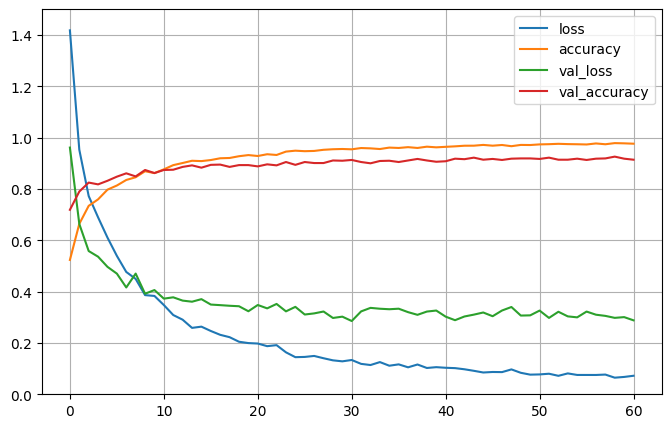

In [141]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

In [142]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.9184


Wow, what a fantastic result! 91% is far better than I expected, and might actually give some solid predictions! I can do a few refinements in a moment, but I want to see what kind of results I can get with the other networks. I'll pick the network to refine at the end.

<a id='CNN_2'></a>
### Model 2: CNN Round 2

In [143]:
X_train_cnn = X_train.to_numpy()[..., np.newaxis]
X_test_cnn = X_test.to_numpy()[..., np.newaxis]
X_val_cnn = X_val.to_numpy()[..., np.newaxis]

In [144]:
input_shape = (X_train_cnn.shape[1], X_train_cnn.shape[2], 1)
print(input_shape)

(57, 1, 1)


In [145]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(512, (4,1), activation='relu', input_shape=(57,1,1)))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (4,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (4,1), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(57, activation='softmax'))

    
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 1, 512)        2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 1, 512)       0         
 )                                                               
                                                                 
 batch_normalization_34 (Bat  (None, 27, 1, 512)       2048      
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 1, 256)        524544    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 1, 256)       0         
 2D)                                                             
                                                     

In [146]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True),
              metrics=["accuracy"])

In [147]:
history = model.fit(x=X_train_cnn, y=y_train, epochs=300, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
219/219 [==============================] - 5s 21ms/step - loss: 2.6044 - accuracy: 0.4311 - val_loss: 3.4689 - val_accuracy: 0.2482
Epoch 2/300
219/219 [==============================] - 5s 21ms/step - loss: 1.5955 - accuracy: 0.6625 - val_loss: 2.1859 - val_accuracy: 0.5075
Epoch 3/300
219/219 [==============================] - 5s 21ms/step - loss: 1.1978 - accuracy: 0.7412 - val_loss: 1.1679 - val_accuracy: 0.7377
Epoch 4/300
219/219 [==============================] - 5s 22ms/step - loss: 0.9348 - accuracy: 0.7912 - val_loss: 0.8789 - val_accuracy: 0.7938
Epoch 5/300
219/219 [==============================] - 5s 21ms/step - loss: 0.7723 - accuracy: 0.8233 - val_loss: 0.7394 - val_accuracy: 0.8108
Epoch 6/300
219/219 [==============================] - 5s 22ms/step - loss: 0.6159 - accuracy: 0.8583 - val_loss: 0.6855 - val_accuracy: 0.8238
Epoch 7/300
219/219 [==============================] - 5s 21ms/step - loss: 0.5206 - accuracy: 0.8799 - val_loss: 0.6156 - val_accuracy:

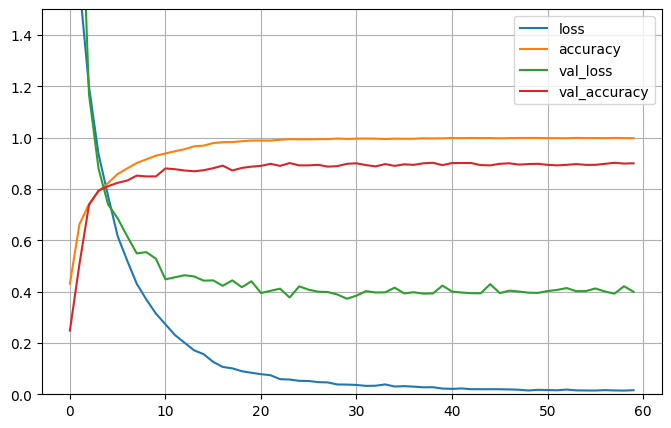

In [148]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

In [150]:
test_eval = model.evaluate(X_test_cnn, y_test, verbose=1)

63/63 [==============================] - 1s 8ms/step - loss: 0.4133 - accuracy: 0.8844


I probably could have ended the fitting a bit earlier, but I'm already getting really solid results from the model. It's not quite as good as the DNN, but I'm very pleased with the results to be sure.

<a id='RNN_2'></a>
### Model 3: RNN Round 2

In [151]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, activation='tanh', input_shape=(57,1), return_sequences=True, recurrent_dropout=0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(128, activation='tanh', recurrent_dropout=0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 57, 128)           66560     
                                                                 
 batch_normalization_37 (Bat  (None, 57, 128)          512       
 chNormalization)                                                
                                                                 
 lstm_47 (LSTM)              (None, 128)               131584    
                                                                 
 batch_normalization_38 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_64 (Dense)            (None, 128)               16512     
                                                                 
 dropout_35 (Dropout)        (None, 128)             

In [152]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005, amsgrad=True),
              metrics=["accuracy"])

In [153]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
219/219 [==============================] - 26s 111ms/step - loss: 1.9761 - accuracy: 0.2936 - val_loss: 3.3828 - val_accuracy: 0.0991
Epoch 2/300
219/219 [==============================] - 22s 100ms/step - loss: 1.6198 - accuracy: 0.4138 - val_loss: 2.4103 - val_accuracy: 0.1742
Epoch 3/300
219/219 [==============================] - 22s 101ms/step - loss: 1.4631 - accuracy: 0.4743 - val_loss: 2.0923 - val_accuracy: 0.3323
Epoch 4/300
219/219 [==============================] - 22s 100ms/step - loss: 1.3873 - accuracy: 0.5014 - val_loss: 2.1761 - val_accuracy: 0.3033
Epoch 5/300
219/219 [==============================] - 22s 99ms/step - loss: 1.3639 - accuracy: 0.5094 - val_loss: 1.5302 - val_accuracy: 0.4665
Epoch 6/300
219/219 [==============================] - 22s 99ms/step - loss: 1.3310 - accuracy: 0.5232 - val_loss: 1.3352 - val_accuracy: 0.5275
Epoch 7/300
219/219 [==============================] - 22s 99ms/step - loss: 1.3094 - accuracy: 0.5328 - val_loss: 1.3627 - va

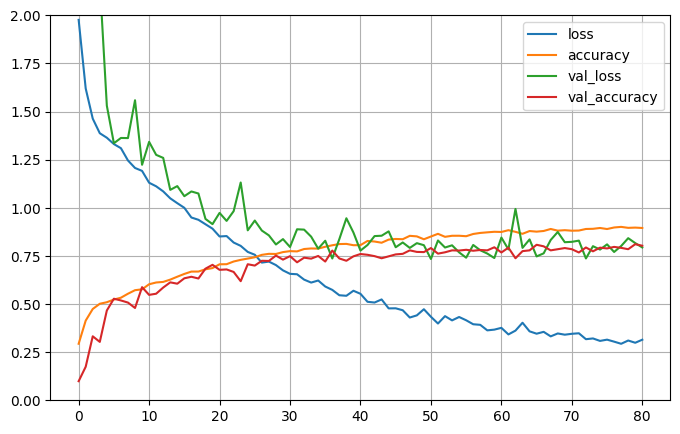

In [155]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [156]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 3s 44ms/step - loss: 0.7805 - accuracy: 0.7793


This model definitely performed the worst, with a 78% accuracy. That still outperforms my best classifier, so I would say that's a pretty good result overall.

<a id='part_3'></a>
## Part 3: Optimizing the best model

Out of the three best models we tested, the DNN managed to perform the best. Since we determined the best model, the final step is to take that model and refine it to get the best performance possible.

In [163]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(150, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 57)                0         
                                                                 
 dense_71 (Dense)            (None, 500)               29000     
                                                                 
 batch_normalization_43 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dropout_40 (Dropout)        (None, 500)               0         
                                                                 
 dense_72 (Dense)            (None, 400)               200400    
                                                                 
 batch_normalization_44 (Bat  (None, 400)              1600      
 chNormalization)                                    

In [158]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [159]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, amsgrad=True),
              metrics=["accuracy"])

In [160]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
219/219 [==============================] - 2s 8ms/step - loss: 1.4072 - accuracy: 0.5437 - val_loss: 0.9564 - val_accuracy: 0.7167
Epoch 2/300
219/219 [==============================] - 2s 7ms/step - loss: 0.8884 - accuracy: 0.6994 - val_loss: 0.6529 - val_accuracy: 0.7838
Epoch 3/300
219/219 [==============================] - 2s 7ms/step - loss: 0.7127 - accuracy: 0.7596 - val_loss: 0.5835 - val_accuracy: 0.8108
Epoch 4/300
219/219 [==============================] - 2s 7ms/step - loss: 0.6068 - accuracy: 0.7951 - val_loss: 0.5154 - val_accuracy: 0.8348
Epoch 5/300
219/219 [==============================] - 2s 7ms/step - loss: 0.5163 - accuracy: 0.8247 - val_loss: 0.4798 - val_accuracy: 0.8408
Epoch 6/300
219/219 [==============================] - 2s 7ms/step - loss: 0.4538 - accuracy: 0.8457 - val_loss: 0.4528 - val_accuracy: 0.8468
Epoch 7/300
219/219 [==============================] - 2s 7ms/step - loss: 0.4087 - accuracy: 0.8587 - val_loss: 0.4625 - val_accuracy: 0.8579

Epoch 58/300
219/219 [==============================] - 2s 7ms/step - loss: 0.0412 - accuracy: 0.9861 - val_loss: 0.3193 - val_accuracy: 0.9189
Epoch 59/300
219/219 [==============================] - 2s 7ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.3738 - val_accuracy: 0.9149
Epoch 60/300
219/219 [==============================] - 2s 7ms/step - loss: 0.0430 - accuracy: 0.9857 - val_loss: 0.3648 - val_accuracy: 0.9129
Epoch 61/300
219/219 [==============================] - 2s 7ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.3632 - val_accuracy: 0.9029
Epoch 62/300
219/219 [==============================] - 2s 7ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.3408 - val_accuracy: 0.9239
Epoch 63/300
219/219 [==============================] - 2s 7ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.3543 - val_accuracy: 0.9179
Epoch 64/300
219/219 [==============================] - 2s 7ms/step - loss: 0.0421 - accuracy: 0.9857 - val_loss: 0.3273 - val_accuracy:

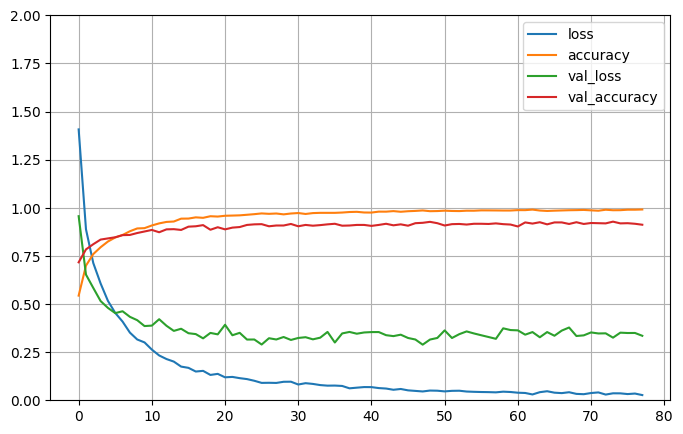

In [161]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [162]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.9174


In [25]:
from keras.layers import PReLU

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[57,]))
model.add(tf.keras.layers.Dense(1024))
model.add(PReLU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512))
model.add(PReLU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(256))
model.add(PReLU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128))
model.add(PReLU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64))
model.add(PReLU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 57)                0         
                                                                 
 dense_18 (Dense)            (None, 1024)              59392     
                                                                 
 p_re_lu_15 (PReLU)          (None, 1024)              1024      
                                                                 
 batch_normalization_15 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                      

In [26]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=["accuracy"])

In [28]:
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
55/55 [==============================] - 2s 9ms/step - loss: 2.0389 - accuracy: 0.3481 - val_loss: 1.5544 - val_accuracy: 0.5686
Epoch 2/300
55/55 [==============================] - 0s 7ms/step - loss: 1.4005 - accuracy: 0.5178 - val_loss: 1.2126 - val_accuracy: 0.6326
Epoch 3/300
55/55 [==============================] - 0s 6ms/step - loss: 1.1492 - accuracy: 0.6060 - val_loss: 0.9730 - val_accuracy: 0.6807
Epoch 4/300
55/55 [==============================] - 0s 6ms/step - loss: 0.9984 - accuracy: 0.6612 - val_loss: 0.7746 - val_accuracy: 0.7447
Epoch 5/300
55/55 [==============================] - 0s 7ms/step - loss: 0.8818 - accuracy: 0.7058 - val_loss: 0.7154 - val_accuracy: 0.7668
Epoch 6/300
55/55 [==============================] - 0s 7ms/step - loss: 0.7944 - accuracy: 0.7369 - val_loss: 0.6335 - val_accuracy: 0.7998
Epoch 7/300
55/55 [==============================] - 0s 6ms/step - loss: 0.7208 - accuracy: 0.7630 - val_loss: 0.5594 - val_accuracy: 0.8218
Epoch 8/300
5

Epoch 59/300
55/55 [==============================] - 0s 6ms/step - loss: 0.0788 - accuracy: 0.9760 - val_loss: 0.4061 - val_accuracy: 0.9179
Epoch 60/300
55/55 [==============================] - 0s 6ms/step - loss: 0.0684 - accuracy: 0.9781 - val_loss: 0.3772 - val_accuracy: 0.9189
Epoch 61/300
55/55 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9771 - val_loss: 0.3814 - val_accuracy: 0.9089
Epoch 62/300
55/55 [==============================] - 0s 6ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.3778 - val_accuracy: 0.9079
Epoch 63/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0807 - accuracy: 0.9753 - val_loss: 0.3848 - val_accuracy: 0.9189
Epoch 64/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0709 - accuracy: 0.9797 - val_loss: 0.3938 - val_accuracy: 0.9209
Epoch 65/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0679 - accuracy: 0.9800 - val_loss: 0.3637 - val_accuracy: 0.9199
Epoch 

55/55 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.4302 - val_accuracy: 0.9209
Epoch 117/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0372 - accuracy: 0.9894 - val_loss: 0.3979 - val_accuracy: 0.9199
Epoch 118/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.4072 - val_accuracy: 0.9239
Epoch 119/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.3959 - val_accuracy: 0.9259
Epoch 120/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0402 - accuracy: 0.9894 - val_loss: 0.3808 - val_accuracy: 0.9229
Epoch 121/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.4115 - val_accuracy: 0.9259
Epoch 122/300
55/55 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.4554 - val_accuracy: 0.9169
Epoch 123/300

In [29]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.9194


In [31]:
predictions = np.argmax(model.predict(X_test), axis=-1)

63/63 [==============================] - 0s 1ms/step


In [30]:
try:
    import scikitplot as skplt
except ModuleNotFoundError:
    %pip install scikit-plot
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error

def model_metrics(y_test,y_pred):
    print("Decoded genres after applying inverse of label encoder : " + str(np.unique(y_pred)))
    skplt.metrics.plot_confusion_matrix(y_test,y_pred,text_fontsize="small",cmap='Greens',figsize=(10,8))
    plt.show()
    print("The classification report for the model : \n\n"+ classification_report(y_test, y_pred))

Decoded genres after applying inverse of label encoder : [0 1 2 3 4 5 6 7 8 9]


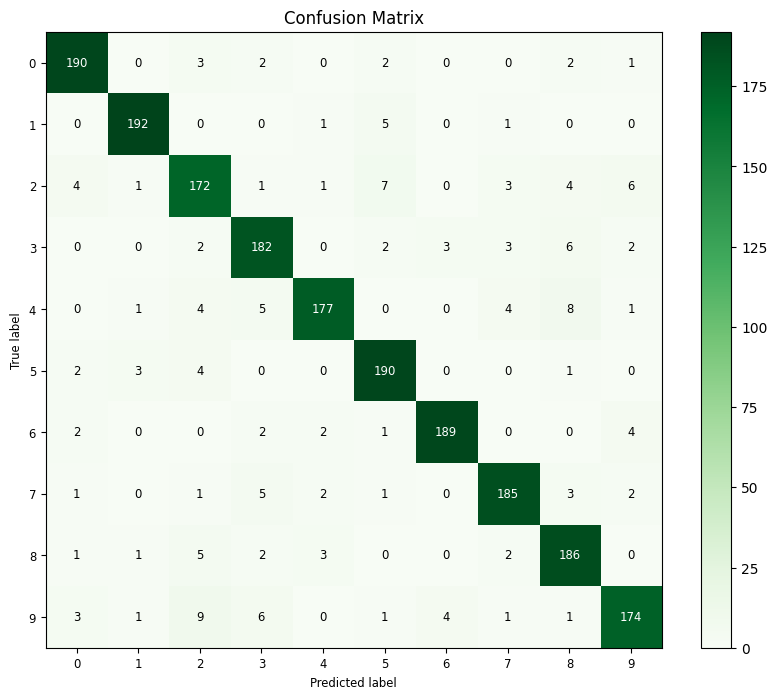

The classification report for the model : 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       200
           1       0.96      0.96      0.96       199
           2       0.86      0.86      0.86       199
           3       0.89      0.91      0.90       200
           4       0.95      0.89      0.92       200
           5       0.91      0.95      0.93       200
           6       0.96      0.94      0.95       200
           7       0.93      0.93      0.93       200
           8       0.88      0.93      0.91       200
           9       0.92      0.87      0.89       200

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998



In [32]:
model_metrics(y_test, predictions)

92% is an absolutely fantastic score and something that I'm personally satisfied with given the amount of data, so I'm going to call it here.

<a id='conclusion'></a>
### Conclusions:
- Models aren't specific to one type of work; they can be applied to many different tasks, with some creative thinking. This doesn't necessarily mean that they'll work better, but it might be worth trying a new model type should I get stuck in the future.
- That being said, many models do excel at the things they're designed for. My CNNs were less accurate compared to my DNNs, and a possible contributing factor to that could very well be the specialization of CNNs for image data. I had to transform my data in a specific way just to get it to work.
- Data is king. This was something I already knew before, but this really does emphasize the importance of data, both in terms of quantity and quality. With more data I was able to crush the classifiers I had in my previous capstone and get an excellent 92% accuracy. 
- There is merit to classifiers. When I started this class, I was under the impression that there wasn't really much reason to use classifiers, since neural networks appeared to serve the same purposes but perform better. I realize this isn't the case now, and will consider the appropriate algorithm, classifier or not, more carefully in the future.

I hope you enjoy going over my Capstone, Prof. Mohsin. Thank you for the semester!